Music genre Prediction using different models. We first use Genre dataframe created using spotipy api

KNN Model 


In [301]:
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
import pandas as pd
import os

In [302]:
df = pd.read_csv(os.path.join("Downloads/spotify_df1.csv"))
df.head()

,artist_name,track_name,track_id,artist_href,track_href,genre_name,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
0,jason mraz,i'm yours,1EzrEOXmMH3G43AXT1y7pA,https://open.spotify.com/artist/4phGZZrJZRo4El...,https://open.spotify.com/track/1EzrEOXmMH3G43A...,acoustic,0.703,0.444,11,-9.331,1,0.0417,0.5590,0.000000,0.0973,0.712,150.960,242947
1,chord overstreet,hold on,5vjLSffimiIP26QG5WcN2K,https://open.spotify.com/artist/5D3muNJhYYunbR...,https://open.spotify.com/track/5vjLSffimiIP26Q...,acoustic,0.618,0.443,2,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.167,119.949,198853
2,the paper kites,bloom - bonus track,1HMQmOWrkieKYWlFsjUP3D,https://open.spotify.com/artist/79hrYiudVcFyyx...,https://open.spotify.com/track/1HMQmOWrkieKYWl...,acoustic,0.591,0.416,1,-9.794,1,0.0246,0.8820,0.000641,0.1120,0.415,96.003,210080
3,sara bareilles,love song,4E6cwWJWZw2zWf7VFbH7wf,https://open.spotify.com/artist/2Sqr0DXoaYABbj...,https://open.spotify.com/track/4E6cwWJWZw2zWf7...,acoustic,0.583,0.786,2,-3.142,0,0.0301,0.0208,0.000000,0.1880,0.573,123.055,258827
4,the paper kites,paint,6uHvbKL0Yi37AuvNRmUfMw,https://open.spotify.com/artist/79hrYiudVcFyyx...,https://open.spotify.com/track/6uHvbKL0Yi37Auv...,acoustic,0.364,0.308,4,-13.052,1,0.0402,0.8950,0.002300,0.1230,0.387,73.328,191773


In [303]:
ML_df = df.drop(['artist_name', 'track_name', 'track_id', 'artist_href', 'track_href'], axis=1)
ML_df.head()

,genre_name,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
0,acoustic,0.703,0.444,11,-9.331,1,0.0417,0.5590,0.000000,0.0973,0.712,150.960,242947
1,acoustic,0.618,0.443,2,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.167,119.949,198853
2,acoustic,0.591,0.416,1,-9.794,1,0.0246,0.8820,0.000641,0.1120,0.415,96.003,210080
3,acoustic,0.583,0.786,2,-3.142,0,0.0301,0.0208,0.000000,0.1880,0.573,123.055,258827
4,acoustic,0.364,0.308,4,-13.052,1,0.0402,0.8950,0.002300,0.1230,0.387,73.328,191773


In [304]:
y = ML_df["genre_name"]

In [305]:
X = ML_df.drop("genre_name", axis=1)
X.head()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
0,0.703,0.444,11,-9.331,1,0.0417,0.5590,0.000000,0.0973,0.712,150.960,242947
1,0.618,0.443,2,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.167,119.949,198853
2,0.591,0.416,1,-9.794,1,0.0246,0.8820,0.000641,0.1120,0.415,96.003,210080
3,0.583,0.786,2,-3.142,0,0.0301,0.0208,0.000000,0.1880,0.573,123.055,258827
4,0.364,0.308,4,-13.052,1,0.0402,0.8950,0.002300,0.1230,0.387,73.328,191773


In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y)

Baseline Accuracy
DummyClassifier model is to establish a baseline performance metric for comparison with other, more sophisticated models. 

In [292]:
from sklearn.dummy import DummyClassifier

dummy_clf = DummyClassifier()
dummy_clf.fit(X_train, y_train)

DummyClassifier()

In [306]:
y_pred = dummy_clf.predict(X_test)
print(y_pred)

[False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False Fa

In [307]:
score = dummy_clf.score(X_test, y_test)
print(score)

0.8695652173913043


K value: 1, Train/Test Accuracy: 1.000/0.752, Overall Accuracy: 1.752
K value: 3, Train/Test Accuracy: 0.875/0.815, Overall Accuracy: 1.690
K value: 5, Train/Test Accuracy: 0.866/0.852, Overall Accuracy: 1.718
K value: 7, Train/Test Accuracy: 0.848/0.861, Overall Accuracy: 1.709
K value: 9, Train/Test Accuracy: 0.851/0.870, Overall Accuracy: 1.721
K value: 11, Train/Test Accuracy: 0.847/0.870, Overall Accuracy: 1.717
K value: 13, Train/Test Accuracy: 0.848/0.870, Overall Accuracy: 1.718
K value: 15, Train/Test Accuracy: 0.848/0.870, Overall Accuracy: 1.718
K value: 17, Train/Test Accuracy: 0.848/0.870, Overall Accuracy: 1.718
K value: 19, Train/Test Accuracy: 0.848/0.870, Overall Accuracy: 1.718


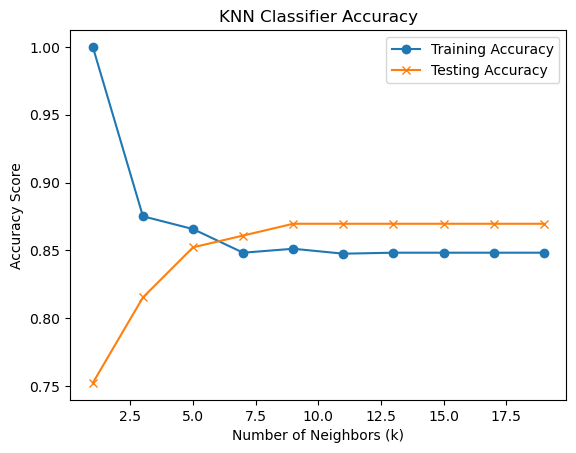

In [308]:
train_accuracy = []
test_accuracy = []
for k in range(1, 20, 2):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    train_acc = knn.score(X_train, y_train)
    test_acc = knn.score(X_test, y_test)
    overall_acc = train_acc + test_acc
    train_accuracy.append(train_acc)
    test_accuracy.append(test_acc)
    print(f"K value: {k}, Train/Test Accuracy: {train_acc:.3f}/{test_acc:.3f}, Overall Accuracy: {overall_acc:.3f}")
    
plt.plot(range(1, 20, 2), train_accuracy, marker='o')
plt.plot(range(1, 20, 2), test_accuracy, marker="x")
plt.xlabel("Number of Neighbors (k)")
plt.ylabel("Accuracy Score")
plt.title("KNN Classifier Accuracy")
plt.legend(["Training Accuracy", "Testing Accuracy"])
plt.show()


SGD - Classifier

In [313]:
#Importing necessary Libraries

import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
import pandas as pd
import numpy as np
import os
from sklearn.linear_model import SGDClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
%matplotlib inline
import matplotlib.pyplot as plt


In [310]:
X = ML_df["genre_name"]

In [311]:
y = ML_df.drop("genre_name", axis=1)

In [312]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [314]:
by_genre = df.groupby("genre_name")["track_name"].count()
by_genre = pd.DataFrame(by_genre)
by_genre

,track_name
genre_name,
acoustic,280
afrobeat,218
alt-rock,296
alternative,75
ambient,291
...,...
kids,290
latin,222
latino,24


In [316]:
# Assign the data to X and y
X = df[["danceability", "energy", "key", "loudness", "mode", "speechiness", "acousticness", "instrumentalness", "liveness", "valence", "tempo", "duration_ms"]]
y = df["genre_name"].values.reshape(-1, 1)
print(X.shape, y.shape)

(16421, 12) (16421, 1)


We shall try Several Linear Models now

In [322]:
# Use Pandas get_dummies to convert categorical data

genretable = pd.get_dummies(ML_df)
genretable.head()


,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,...,genre_name_j-idol,genre_name_j-pop,genre_name_j-rock,genre_name_jazz,genre_name_k-pop,genre_name_kids,genre_name_latin,genre_name_latino,genre_name_malay,genre_name_mandopop
0,0.703,0.444,11,-9.331,1,0.0417,0.5590,0.000000,0.0973,0.712,...,False,False,False,False,False,False,False,False,False,False
1,0.618,0.443,2,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.167,...,False,False,False,False,False,False,False,False,False,False
2,0.591,0.416,1,-9.794,1,0.0246,0.8820,0.000641,0.1120,0.415,...,False,False,False,False,False,False,False,False,False,False
3,0.583,0.786,2,-3.142,0,0.0301,0.0208,0.000000,0.1880,0.573,...,False,False,False,False,False,False,False,False,False,False
4,0.364,0.308,4,-13.052,1,0.0402,0.8950,0.002300,0.1230,0.387,...,False,False,False,False,False,False,False,False,False,False


In [323]:
X = genretable[["danceability"]]
y = genretable["genre_name_dance"].values.reshape(-1, 1)
print(X.shape, y.shape)

(16421, 1) (16421, 1)


In [324]:
# Split the data into training and testing

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)


In [325]:
from sklearn.preprocessing import StandardScaler

# Creating a StandardScater model and fit it to the training data
X_scaler = StandardScaler().fit(X_train)
y_scaler = StandardScaler().fit(y_train)


In [326]:
# Transforming the training and testing data using the X_scaler and y_scaler models

# Importing the StandardScaler class from sklearn.preprocessing
from sklearn.preprocessing import StandardScaler

# Creating an instance of the StandardScaler class
scaler_X = StandardScaler()
scaler_y = StandardScaler()

# Fitting the scaler to the training data and transforming both training and testing data
X_train_scaled = scaler_X.fit_transform(X_train)
X_test_scaled = scaler_X.transform(X_test)
y_train_scaled = scaler_y.fit_transform(y_train)
y_test_scaled = scaler_y.transform(y_test)


In [327]:
# Creating a LinearRegression model and fit it to the scaled training data


from sklearn.linear_model import LinearRegression

models = []

model = LinearRegression()
model.fit(X_train_scaled, y_train_scaled)


LinearRegression()

In [337]:
# Using X_test_scaled, y_test_scaled, and model.predict(X_test_scaled) to calculate MSE and R2

# Importing the mean_square_erro class from sklearn.metrics
from sklearn.metrics import mean_squared_error

MSE = mean_squared_error(y_test_scaled,X_test_scaled )
r2 = model.score(X_test_scaled, y_test_scaled)

print(f"MSE: {MSE}, R2: {r2}")
models.append({"model": "LinearRegression",
            "MSE": MSE,
            "R2":r2})

MSE: 1.8290078285065003, R2: 0.008449752623810536


In [338]:
# Lasso model
from sklearn.linear_model import Lasso
alpha = 0.01
lasso = Lasso(alpha=alpha)
lasso.fit(X_train_scaled, y_train_scaled)

lasso_predictions = lasso.predict(X_test_scaled)

lasso_mse = mean_squared_error(y_test_scaled, lasso_predictions)
lasso_r2 = lasso.score(X_test_scaled, y_test_scaled)

print(f"LASSO MSE: {lasso_mse}, R2: {lasso_r2}")
models.append({"model": "Lasso", "MSE": lasso_mse, "R2": lasso_r2})


LASSO MSE: 1.0250738687278018, R2: 0.008367392955300423


In [339]:
##Ridge Model
# Define Ridge model with alpha value of 0.01
from sklearn.linear_model import Ridge
ridge_model = Ridge(alpha=0.01)

# Fit the scaled training data to the Ridge model
X_train_scaled_ridge = X_scaler.transform(X_train)
y_train_scaled_ridge = y_scaler.transform(y_train)
ridge_model.fit(X_train_scaled_ridge, y_train_scaled_ridge)

# Use the Ridge model to predict values for the scaled test data
X_test_scaled_ridge = X_scaler.transform(X_test)
y_test_scaled_ridge = y_scaler.transform(y_test)
predictions_ridge = ridge_model.predict(X_test_scaled_ridge)

# Calculate the mean squared error and R2 score for the Ridge model predictions
from sklearn.metrics import mean_squared_error, r2_score
mse_ridge = mean_squared_error(y_test_scaled_ridge, predictions_ridge)
r2_ridge = r2_score(y_test_scaled_ridge, predictions_ridge)

# Print the MSE and R2 score for the Ridge model predictions
print(f"Ridge model MSE: {mse_ridge}, R2 score: {r2_ridge}")

# Append the Ridge model name, MSE, and R2 score to the models list
models.append({"model": "Ridge",
               "MSE": mse_ridge,
               "R2": r2_ridge})


Ridge model MSE: 1.02498873150826, R2 score: 0.008449752720334214


In [340]:
# # ElasticNet model

from sklearn.linear_model import ElasticNet

# create an ElasticNet model with alpha=0.01
en_model = ElasticNet(alpha=0.01)

# fit the model to the scaled training data
en_model.fit(X_train_scaled, y_train_scaled)

# use the model to predict the output on the scaled test data
y_pred_scaled = en_model.predict(X_test_scaled)

# calculate the mean squared error (MSE) and R-squared (R2) score
mse = mean_squared_error(y_test_scaled, y_pred_scaled)
r2 = en_model.score(X_test_scaled, y_test_scaled)

# Print the MSE and R2 score for the Ridge model predictions
print(f"ElasticNet model MSE: {mse}, R2 score: {r2}")
# add the model results to a list
models.append({
    "model": "ElasticNet",
    "MSE": mse,
    "R2": r2
})


ElasticNet model MSE: 1.0250108015878807, R2 score: 0.008428402638881782


In [341]:
a = pd.DataFrame(models)
a[a["R2"]==a["R2"].max()]

,model,MSE,R2,model_name
3,Ridge,1.024989,0.00845,NaN
8,Ridge,1.024989,0.00845,NaN


In [342]:
a

,model,MSE,R2,model_name
0,LinearRegression,1.829008,0.008450,NaN
1,Lasso,1.025074,0.008367,NaN
2,Lasso,1.025074,0.008367,NaN
3,Ridge,1.024989,0.008450,NaN
4,NaN,1.025011,0.008428,ElasticNet
5,NaN,1.025011,0.008428,ElasticNet
6,LinearRegression,1.829008,0.008450,NaN
7,Lasso,1.025074,0.008367,NaN
8,Ridge,1.024989,0.008450,NaN
9,ElasticNet,1.025011,0.008428,NaN


Logistic Regression

In [343]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import os

In [344]:
ML_df

,genre_name,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
0,acoustic,0.703,0.444,11,-9.331,1,0.0417,0.5590,0.000000,0.0973,0.712,150.960,242947
1,acoustic,0.618,0.443,2,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.167,119.949,198853
2,acoustic,0.591,0.416,1,-9.794,1,0.0246,0.8820,0.000641,0.1120,0.415,96.003,210080
3,acoustic,0.583,0.786,2,-3.142,0,0.0301,0.0208,0.000000,0.1880,0.573,123.055,258827
4,acoustic,0.364,0.308,4,-13.052,1,0.0402,0.8950,0.002300,0.1230,0.387,73.328,191773
...,...,...,...,...,...,...,...,...,...,...,...,...,...
16416,mandopop,0.460,0.297,9,-8.785,1,0.0309,0.6920,0.000318,0.1070,0.125,180.095,357094
16417,mandopop,0.720,0.529,10,-8.928,1,0.0406,0.5590,0.000021,0.1630,0.267,133.967,242293
16418,mandopop,0.657,0.304,10,-9.115,1,0.0335,0.8340,0.000000,0.1170,0.413,124.781,223570
16419,mandopop,0.605,0.310,7,-10.276,1,0.0390,0.8490,0.000000,0.1360,0.292,118.028,245521


In [345]:
# Assign X (data) and y (target)
X = ML_df.drop("genre_name", axis=1)
y = ML_df["genre_name"]
print(X.shape, y.shape)

(16421, 12) (16421,)


In [346]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, stratify=y)

In [347]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier

LogisticRegression()

In [348]:
y_train

6155         deep-house
10412            groove
6452     detroit-techno
12358           hip-hop
2198              blues
              ...      
10921             happy
2117              blues
6367     detroit-techno
5750          dancehall
15256             k-pop
Name: genre_name, Length: 12315, dtype: object

In [349]:
classifier.fit(X_train, y_train)

LogisticRegression()

In [350]:
print(f"Training Data Score: {classifier.score(X_train, y_train)}")
print(f"Testing Data Score: {classifier.score(X_test, y_test)}")

Training Data Score: 0.04734064149411287
Testing Data Score: 0.04870920603994155


In [351]:
predictions = classifier.predict(X_test)
print(f"First 10 Predictions:   {predictions[:10]}")
print(f"First 10 Actual labels: {y_test[:10].tolist()}")

First 10 Predictions:   ['drum-and-bass' 'children' 'drum-and-bass' 'drum-and-bass'
 'chicago-house' 'happy' 'drum-and-bass' 'drum-and-bass' 'chicago-house'
 'hardstyle']
First 10 Actual labels: ['hardstyle', 'classical', 'drum-and-bass', 'folk', 'british', 'alt-rock', 'black-metal', 'k-pop', 'j-rock', 'honky-tonk']


In [352]:
pd.DataFrame({"Prediction": predictions, "Actual": y_test}).reset_index(drop=True)

,Prediction,Actual
0,drum-and-bass,hardstyle
1,children,classical
2,drum-and-bass,drum-and-bass
3,drum-and-bass,folk
4,chicago-house,british
...,...,...
4101,drum-and-bass,indie
4102,breakbeat,disco
4103,cantopop,acoustic
4104,chicago-house,heavy-metal


Trying with Neural Network Deep Learning


In [357]:
#Importing necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [353]:
# Assign X (data) and y (target)
X = ML_df.drop("genre_name", axis=1)
y = ML_df["genre_name"]
print(X.shape, y.shape)

(16421, 12) (16421,)


In [354]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, stratify=y)

In [355]:
X_scaler = MinMaxScaler().fit(X_train)
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [356]:
# Step 1: Label-encode data set
label_encoder = LabelEncoder()
label_encoder.fit(y_train)
encoded_y_train = label_encoder.transform(y_train)
encoded_y_test = label_encoder.transform(y_test)

In [377]:
# Step 2: Convert encoded labels to one-hot-encoding
y_train_categorical = to_categorical(encoded_y_train)
y_test_categorical = to_categorical(encoded_y_test)

In [382]:
# Create model and add layers
model = Sequential()
model.add(Dense(units=70, activation='relu', input_dim=12))
model.add(Dense(units=70, activation='relu'))
model.add(Dense(units=70, activation='relu'))
model.add(Dense(units=70, activation='softmax'))

In [383]:
# Compile and fit the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [384]:
model.summary()

Model: "sequential_26"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_109 (Dense)           (None, 70)                910       
                                                                 
 dense_110 (Dense)           (None, 70)                4970      
                                                                 
 dense_111 (Dense)           (None, 70)                4970      
                                                                 
 dense_112 (Dense)           (None, 70)                4970      
                                                                 
Total params: 15,820
Trainable params: 15,820
Non-trainable params: 0
_________________________________________________________________


In [385]:
model.fit(
    X_train_scaled,
    y_train_categorical,
    epochs=10,
    shuffle=True,
    verbose=2
)

Epoch 1/10
385/385 - 1s - loss: 3.7595 - accuracy: 0.0833 - 1s/epoch - 3ms/step
Epoch 2/10
385/385 - 0s - loss: 3.3426 - accuracy: 0.1429 - 367ms/epoch - 953us/step
Epoch 3/10
385/385 - 0s - loss: 3.2227 - accuracy: 0.1667 - 351ms/epoch - 911us/step
Epoch 4/10
385/385 - 0s - loss: 3.1498 - accuracy: 0.1839 - 367ms/epoch - 953us/step
Epoch 5/10
385/385 - 0s - loss: 3.0987 - accuracy: 0.1975 - 358ms/epoch - 931us/step
Epoch 6/10
385/385 - 0s - loss: 3.0686 - accuracy: 0.2017 - 350ms/epoch - 910us/step
Epoch 7/10
385/385 - 0s - loss: 3.0387 - accuracy: 0.2072 - 373ms/epoch - 969us/step
Epoch 8/10
385/385 - 0s - loss: 3.0128 - accuracy: 0.2149 - 352ms/epoch - 913us/step
Epoch 9/10
385/385 - 0s - loss: 2.9788 - accuracy: 0.2191 - 358ms/epoch - 931us/step
Epoch 10/10
385/385 - 0s - loss: 2.9605 - accuracy: 0.2216 - 366ms/epoch - 950us/step


In [386]:
model_loss, model_accuracy = model.evaluate(
    X_test_scaled, y_test_categorical, verbose=2)
print(
    f"Normal Neural Network - Loss: {model_loss}, Accuracy: {model_accuracy}")

129/129 - 0s - loss: 3.0211 - accuracy: 0.2094 - 213ms/epoch - 2ms/step
Normal Neural Network - Loss: 3.02108097076416, Accuracy: 0.20944958925247192


In [387]:
# Create model and add layers
model = Sequential()
model.add(Dense(units=70, activation='relu', input_dim=12))

model.add(Dense(units=70, activation='relu'))
# model.add(Dense(units=70, activation='relu'))
# model.add(Dense(units=70, activation='relu'))
model.add(Dense(units=70, activation='sigmoid'))
# model.add(Dense(units=70, activation='softmax'))
model.add(Dense(units=70, activation='softmax'))

In [388]:
# Compile and fit the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [389]:
model.summary()

Model: "sequential_27"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_113 (Dense)           (None, 70)                910       
                                                                 
 dense_114 (Dense)           (None, 70)                4970      
                                                                 
 dense_115 (Dense)           (None, 70)                4970      
                                                                 
 dense_116 (Dense)           (None, 70)                4970      
                                                                 
Total params: 15,820
Trainable params: 15,820
Non-trainable params: 0
_________________________________________________________________


In [390]:
model.fit(
    X_train_scaled,
    y_train_categorical,
    epochs=10,
    shuffle=True,
    verbose=2
)

Epoch 1/10
385/385 - 1s - loss: 4.0174 - accuracy: 0.0542 - 925ms/epoch - 2ms/step
Epoch 2/10
385/385 - 0s - loss: 3.5759 - accuracy: 0.1117 - 383ms/epoch - 996us/step
Epoch 3/10
385/385 - 0s - loss: 3.4134 - accuracy: 0.1336 - 383ms/epoch - 994us/step
Epoch 4/10
385/385 - 0s - loss: 3.2924 - accuracy: 0.1622 - 343ms/epoch - 890us/step
Epoch 5/10
385/385 - 0s - loss: 3.2168 - accuracy: 0.1726 - 351ms/epoch - 911us/step
Epoch 6/10
385/385 - 0s - loss: 3.1615 - accuracy: 0.1861 - 359ms/epoch - 933us/step
Epoch 7/10
385/385 - 0s - loss: 3.1179 - accuracy: 0.1942 - 357ms/epoch - 928us/step
Epoch 8/10
385/385 - 0s - loss: 3.0880 - accuracy: 0.2006 - 352ms/epoch - 913us/step
Epoch 9/10
385/385 - 0s - loss: 3.0575 - accuracy: 0.2056 - 355ms/epoch - 923us/step
Epoch 10/10
385/385 - 0s - loss: 3.0367 - accuracy: 0.2095 - 361ms/epoch - 937us/step


In [391]:
model_loss, model_accuracy = model.evaluate(
    X_test_scaled, y_test_categorical, verbose=2)
print(
    f"Normal Neural Network - Loss: {model_loss}, Accuracy: {model_accuracy}")

129/129 - 0s - loss: 3.0972 - accuracy: 0.2046 - 225ms/epoch - 2ms/step
Normal Neural Network - Loss: 3.09723162651062, Accuracy: 0.20457866787910461


In [392]:
predicted_probabilities = model.predict(X_test_scaled[:5])
predicted_labels = label_encoder.inverse_transform(predicted_probabilities.argmax(axis=-1))

print(f"Predicted classes: {predicted_labels}")
print(f"Actual Labels: {list(y_test[:5])}")

1/1 [==============================] - 0s 56ms/step
Predicted classes: ['grindcore' 'classical' 'forro' 'country' 'detroit-techno']
Actual Labels: ['heavy-metal', 'classical', 'industrial', 'dub', 'detroit-techno']


Trying it with lesser features now

In [393]:
ML_df

,genre_name,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
0,acoustic,0.703,0.444,11,-9.331,1,0.0417,0.5590,0.000000,0.0973,0.712,150.960,242947
1,acoustic,0.618,0.443,2,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.167,119.949,198853
2,acoustic,0.591,0.416,1,-9.794,1,0.0246,0.8820,0.000641,0.1120,0.415,96.003,210080
3,acoustic,0.583,0.786,2,-3.142,0,0.0301,0.0208,0.000000,0.1880,0.573,123.055,258827
4,acoustic,0.364,0.308,4,-13.052,1,0.0402,0.8950,0.002300,0.1230,0.387,73.328,191773
...,...,...,...,...,...,...,...,...,...,...,...,...,...
16416,mandopop,0.460,0.297,9,-8.785,1,0.0309,0.6920,0.000318,0.1070,0.125,180.095,357094
16417,mandopop,0.720,0.529,10,-8.928,1,0.0406,0.5590,0.000021,0.1630,0.267,133.967,242293
16418,mandopop,0.657,0.304,10,-9.115,1,0.0335,0.8340,0.000000,0.1170,0.413,124.781,223570
16419,mandopop,0.605,0.310,7,-10.276,1,0.0390,0.8490,0.000000,0.1360,0.292,118.028,245521


In [394]:
new_ML_df = ML_df.drop(['mode'], axis=1)
new_ML_df.head()

,genre_name,danceability,energy,key,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
0,acoustic,0.703,0.444,11,-9.331,0.0417,0.5590,0.000000,0.0973,0.712,150.960,242947
1,acoustic,0.618,0.443,2,-9.681,0.0526,0.4690,0.000000,0.0829,0.167,119.949,198853
2,acoustic,0.591,0.416,1,-9.794,0.0246,0.8820,0.000641,0.1120,0.415,96.003,210080
3,acoustic,0.583,0.786,2,-3.142,0.0301,0.0208,0.000000,0.1880,0.573,123.055,258827
4,acoustic,0.364,0.308,4,-13.052,0.0402,0.8950,0.002300,0.1230,0.387,73.328,191773


In [395]:
# Assign X (data) and y (target)
X = new_ML_df.drop("genre_name", axis=1)
y = new_ML_df["genre_name"]
print(X.shape, y.shape)

(16421, 11) (16421,)


In [399]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from tensorflow.keras.utils import to_categorical

In [400]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, stratify=y)

In [401]:
X_scaler = MinMaxScaler().fit(X_train)
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [402]:
# Step 1: Label-encode data set
label_encoder = LabelEncoder()
label_encoder.fit(y_train)
encoded_y_train = label_encoder.transform(y_train)
encoded_y_test = label_encoder.transform(y_test)

In [403]:
# Step 2: Convert encoded labels to one-hot-encoding
y_train_categorical = to_categorical(encoded_y_train)
y_test_categorical = to_categorical(encoded_y_test)

In [404]:
# Create model and add layers
model = Sequential()
model.add(Dense(units=70, activation='relu', input_dim=11))
# model.add(Dense(units=70, activation='sigmoid'))
# model.add(Dense(units=70, activation='sigmoid'))
# model.add(Dense(units=70, activation='sigmoid'))
model.add(Dense(units=70, activation='relu'))
model.add(Dense(units=70, activation='relu'))
model.add(Dense(units=70, activation='relu'))
# model.add(Dense(units=70, activation='softmax'))
model.add(Dense(units=70, activation='softplus'))
# model.add(Dense(units=70, activation='softsign'))


In [405]:
# Compile and fit the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [406]:
model.summary()

Model: "sequential_28"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_117 (Dense)           (None, 70)                840       
                                                                 
 dense_118 (Dense)           (None, 70)                4970      
                                                                 
 dense_119 (Dense)           (None, 70)                4970      
                                                                 
 dense_120 (Dense)           (None, 70)                4970      
                                                                 
 dense_121 (Dense)           (None, 70)                4970      
                                                                 
Total params: 20,720
Trainable params: 20,720
Non-trainable params: 0
_________________________________________________________________


In [407]:
model.fit(
    X_train_scaled,
    y_train_categorical,
    epochs=100,
    shuffle=True,
    verbose=2
)

Epoch 1/100
385/385 - 1s - loss: 3.8197 - accuracy: 0.0656 - 1s/epoch - 3ms/step
Epoch 2/100
385/385 - 0s - loss: 3.4117 - accuracy: 0.1271 - 442ms/epoch - 1ms/step
Epoch 3/100
385/385 - 0s - loss: 3.2297 - accuracy: 0.1633 - 397ms/epoch - 1ms/step
Epoch 4/100
385/385 - 0s - loss: 3.1483 - accuracy: 0.1851 - 403ms/epoch - 1ms/step
Epoch 5/100
385/385 - 0s - loss: 3.1055 - accuracy: 0.1918 - 401ms/epoch - 1ms/step
Epoch 6/100
385/385 - 0s - loss: 3.0751 - accuracy: 0.1989 - 416ms/epoch - 1ms/step
Epoch 7/100
385/385 - 0s - loss: 3.0388 - accuracy: 0.2028 - 424ms/epoch - 1ms/step
Epoch 8/100
385/385 - 0s - loss: 3.0067 - accuracy: 0.2074 - 408ms/epoch - 1ms/step
Epoch 9/100
385/385 - 0s - loss: 2.9836 - accuracy: 0.2143 - 407ms/epoch - 1ms/step
Epoch 10/100
385/385 - 0s - loss: 2.9559 - accuracy: 0.2176 - 441ms/epoch - 1ms/step
Epoch 11/100
385/385 - 0s - loss: 2.9347 - accuracy: 0.2215 - 441ms/epoch - 1ms/step
Epoch 12/100
385/385 - 0s - loss: 2.9207 - accuracy: 0.2277 - 462ms/epoch - 1

In [408]:
model_loss, model_accuracy = model.evaluate(
    X_test_scaled, y_test_categorical, verbose=2)
print(
    f"Normal Neural Network - Loss: {model_loss}, Accuracy: {model_accuracy}")

129/129 - 0s - loss: 2.9835 - accuracy: 0.2594 - 197ms/epoch - 2ms/step
Normal Neural Network - Loss: 2.983454942703247, Accuracy: 0.25937652587890625


 Changing the Genre Dataframe - Considering the Top 50 Genres

In [409]:
df = pd.read_csv(os.path.join("Downloads/spotify_df_Top50Genre.csv"))
df.head()

,artist_name,track_name,track_id,artist_href,track_href,genre_name,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
0,drake,search & rescue,7aRCf5cLOFN1U7kvtChY1G,https://open.spotify.com/artist/3TVXtAsR1Inumw...,https://open.spotify.com/track/7aRCf5cLOFN1U7k...,Hip-Hop,0.817,0.440,10,-8.482,0,0.0734,0.0603,0.000001,0.3300,0.544,142.024,272113
1,"tyler, the creator",see you again (feat. kali uchis),7KA4W4McWYRpgf0fWsJZWB,https://open.spotify.com/artist/4V8LLVI7PbaPR0...,https://open.spotify.com/track/7KA4W4McWYRpgf0...,Hip-Hop,0.558,0.559,6,-9.222,1,0.0959,0.3710,0.000007,0.1090,0.620,78.558,180387
2,metro boomin,creepin' (with the weeknd & 21 savage),2dHHgzDwk4BJdRwy9uXhTO,https://open.spotify.com/artist/0iEtIxbK0KxaSl...,https://open.spotify.com/track/2dHHgzDwk4BJdRw...,Hip-Hop,0.715,0.620,1,-6.005,0,0.0484,0.4170,0.000000,0.0822,0.172,97.950,221520
3,j. cole,no role modelz,68Dni7IE4VyPkTOH9mRWHr,https://open.spotify.com/artist/6l3HvQ5sa6mXTs...,https://open.spotify.com/track/68Dni7IE4VyPkTO...,Hip-Hop,0.690,0.521,10,-8.492,0,0.3390,0.3240,0.000000,0.0534,0.494,100.028,292799
4,drake,rich flex,1bDbXMyjaUIooNwFE9wn0N,https://open.spotify.com/artist/3TVXtAsR1Inumw...,https://open.spotify.com/track/1bDbXMyjaUIooNw...,Hip-Hop,0.561,0.520,11,-9.342,0,0.2440,0.0503,0.000002,0.3550,0.424,153.150,239360


In [410]:
ML_df = df.drop(['artist_name', 'track_name', 'track_id', 'artist_href', 'track_href'], axis=1)
ML_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2434 entries, 0 to 2433
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   genre_name        2434 non-null   object 
 1   danceability      2434 non-null   float64
 2   energy            2434 non-null   float64
 3   key               2434 non-null   int64  
 4   loudness          2434 non-null   float64
 5   mode              2434 non-null   int64  
 6   speechiness       2434 non-null   float64
 7   acousticness      2434 non-null   float64
 8   instrumentalness  2434 non-null   float64
 9   liveness          2434 non-null   float64
 10  valence           2434 non-null   float64
 11  tempo             2434 non-null   float64
 12  duration_ms       2434 non-null   int64  
dtypes: float64(9), int64(3), object(1)
memory usage: 247.3+ KB


In [411]:
X = ML_df.drop("genre_name", axis=1)
y = ML_df["genre_name"]
print(X.shape, y.shape)

(2434, 12) (2434,)


In [412]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, stratify=y)

In [413]:
X_scaler = MinMaxScaler().fit(X_train)
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [414]:
# Step 1: Label-encode data set
label_encoder = LabelEncoder()
label_encoder.fit(y_train)
encoded_y_train = label_encoder.transform(y_train)
encoded_y_test = label_encoder.transform(y_test)

In [415]:
# Step 2: Convert encoded labels to one-hot-encoding
y_train_categorical = to_categorical(encoded_y_train)
y_test_categorical = to_categorical(encoded_y_test)

In [416]:
# Create model and add layers
model = Sequential()
model.add(Dense(units=10, activation='relu', input_dim=12))
# model.add(Dense(units=10, activation='sigmoid'))
# model.add(Dense(units=10, activation='sigmoid'))
# model.add(Dense(units=10, activation='sigmoid'))
model.add(Dense(units=10, activation='relu'))
model.add(Dense(units=10, activation='relu'))
model.add(Dense(units=10, activation='relu'))
model.add(Dense(units=10, activation='relu'))
# model.add(Dense(units=10, activation='relu'))
model.add(Dense(units=10, activation='softmax'))

In [417]:
# Compile and fit the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [418]:
model.summary()

Model: "sequential_29"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_122 (Dense)           (None, 10)                130       
                                                                 
 dense_123 (Dense)           (None, 10)                110       
                                                                 
 dense_124 (Dense)           (None, 10)                110       
                                                                 
 dense_125 (Dense)           (None, 10)                110       
                                                                 
 dense_126 (Dense)           (None, 10)                110       
                                                                 
 dense_127 (Dense)           (None, 10)                110       
                                                                 
Total params: 680
Trainable params: 680
Non-trainable

In [419]:
model.fit(
    X_train_scaled,
    y_train_categorical,
    epochs=200,
    shuffle=True,
    verbose=2
)

Epoch 1/200
58/58 - 1s - loss: 2.3007 - accuracy: 0.1058 - 775ms/epoch - 13ms/step
Epoch 2/200
58/58 - 0s - loss: 2.2907 - accuracy: 0.1068 - 66ms/epoch - 1ms/step
Epoch 3/200
58/58 - 0s - loss: 2.2809 - accuracy: 0.1326 - 83ms/epoch - 1ms/step
Epoch 4/200
58/58 - 0s - loss: 2.2640 - accuracy: 0.1359 - 73ms/epoch - 1ms/step
Epoch 5/200
58/58 - 0s - loss: 2.2368 - accuracy: 0.1595 - 74ms/epoch - 1ms/step
Epoch 6/200
58/58 - 0s - loss: 2.1985 - accuracy: 0.1726 - 71ms/epoch - 1ms/step
Epoch 7/200
58/58 - 0s - loss: 2.1553 - accuracy: 0.1847 - 71ms/epoch - 1ms/step
Epoch 8/200
58/58 - 0s - loss: 2.1058 - accuracy: 0.2252 - 68ms/epoch - 1ms/step
Epoch 9/200
58/58 - 0s - loss: 2.0630 - accuracy: 0.2438 - 67ms/epoch - 1ms/step
Epoch 10/200
58/58 - 0s - loss: 2.0292 - accuracy: 0.2400 - 69ms/epoch - 1ms/step
Epoch 11/200
58/58 - 0s - loss: 1.9890 - accuracy: 0.2630 - 63ms/epoch - 1ms/step
Epoch 12/200
58/58 - 0s - loss: 1.9621 - accuracy: 0.2685 - 67ms/epoch - 1ms/step
Epoch 13/200
58/58 - 0s

In [420]:
model_loss, model_accuracy = model.evaluate(
    X_test_scaled, y_test_categorical, verbose=2)
print(
    f"Normal Neural Network - Loss: {model_loss}, Accuracy: {model_accuracy}")

20/20 - 0s - loss: 1.6301 - accuracy: 0.4319 - 124ms/epoch - 6ms/step
Normal Neural Network - Loss: 1.630128026008606, Accuracy: 0.4318554997444153


 trying this with less features

In [421]:
ML_df.head()

,genre_name,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
0,Hip-Hop,0.817,0.440,10,-8.482,0,0.0734,0.0603,0.000001,0.3300,0.544,142.024,272113
1,Hip-Hop,0.558,0.559,6,-9.222,1,0.0959,0.3710,0.000007,0.1090,0.620,78.558,180387
2,Hip-Hop,0.715,0.620,1,-6.005,0,0.0484,0.4170,0.000000,0.0822,0.172,97.950,221520
3,Hip-Hop,0.690,0.521,10,-8.492,0,0.3390,0.3240,0.000000,0.0534,0.494,100.028,292799
4,Hip-Hop,0.561,0.520,11,-9.342,0,0.2440,0.0503,0.000002,0.3550,0.424,153.150,239360


In [425]:

droppedML_df = ML_df.drop(['danceability',
                            'energy',
                            'key',
                            'loudness',
                            'mode', 
                            'speechiness', 
                            'acousticness', 
                            'instrumentalness', 
                            'liveness', 
                            'valence', 
                            'tempo'],
                           axis=1)

# dropped_ML_df()
print(droppedML_df)
droppedML_df.iloc[2000:2005]

     genre_name  duration_ms
0       Hip-Hop       272113
1       Hip-Hop       180387
2       Hip-Hop       221520
3       Hip-Hop       292799
4       Hip-Hop       239360
...         ...          ...
2429       Mood       141000
2430       Mood       140197
2431       Mood       146625
2432       Mood       189000
2433       Mood       130625

[2434 rows x 2 columns]


,genre_name,duration_ms
2000,Dance/Electronic,79173
2001,Dance/Electronic,161972
2002,Dance/Electronic,342000
2003,Dance/Electronic,184000
2004,Dance/Electronic,245133


In [426]:
X = droppedML_df.drop("genre_name", axis=1)
y = droppedML_df["genre_name"]
print(X.shape, y.shape)

(2434, 1) (2434,)


In [427]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, stratify=y)

In [428]:
X_scaler = MinMaxScaler().fit(X_train)
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [429]:
# Step 1: Label-encode data set
label_encoder = LabelEncoder()
label_encoder.fit(y_train)
encoded_y_train = label_encoder.transform(y_train)
encoded_y_test = label_encoder.transform(y_test)

In [430]:
# Step 2: Convert encoded labels to one-hot-encoding
y_train_categorical = to_categorical(encoded_y_train)
y_test_categorical = to_categorical(encoded_y_test)

In [431]:
# Create model and add layers
model = Sequential()
model.add(Dense(units=10, activation='relu', input_dim =1))
# model.add(Dense(units=10, activation='sigmoid'))
# model.add(Dense(units=10, activation='sigmoid'))
# model.add(Dense(units=10, activation='sigmoid'))
# model.add(Dense(units=10, activation='relu'))
# model.add(Dense(units=10, activation='relu'))
# model.add(Dense(units=10, activation='relu'))
# model.add(Dense(units=10, activation='relu'))
# model.add(Dense(units=10, activation='relu'))
model.add(Dense(units=10, activation='softmax'))

In [432]:
# Compile and fit the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [433]:
model.fit(
    X_train_scaled,
    y_train_categorical,
    epochs=10,
    shuffle=True,
    verbose=2
)

Epoch 1/10
58/58 - 0s - loss: 2.3066 - accuracy: 0.0953 - 392ms/epoch - 7ms/step
Epoch 2/10
58/58 - 0s - loss: 2.2928 - accuracy: 0.1205 - 52ms/epoch - 888us/step
Epoch 3/10
58/58 - 0s - loss: 2.2844 - accuracy: 0.1211 - 59ms/epoch - 1ms/step
Epoch 4/10
58/58 - 0s - loss: 2.2792 - accuracy: 0.1288 - 51ms/epoch - 873us/step
Epoch 5/10
58/58 - 0s - loss: 2.2755 - accuracy: 0.1238 - 67ms/epoch - 1ms/step
Epoch 6/10
58/58 - 0s - loss: 2.2721 - accuracy: 0.1304 - 52ms/epoch - 888us/step
Epoch 7/10
58/58 - 0s - loss: 2.2697 - accuracy: 0.1321 - 56ms/epoch - 973us/step
Epoch 8/10
58/58 - 0s - loss: 2.2677 - accuracy: 0.1403 - 59ms/epoch - 1ms/step
Epoch 9/10
58/58 - 0s - loss: 2.2661 - accuracy: 0.1304 - 59ms/epoch - 1ms/step
Epoch 10/10
58/58 - 0s - loss: 2.2647 - accuracy: 0.1386 - 59ms/epoch - 1ms/step


In [434]:
model_loss, model_accuracy = model.evaluate(
    X_test_scaled, y_test_categorical, verbose=2)
print(
    f"Normal Neural Network - Loss: {model_loss}, Accuracy: {model_accuracy}")

20/20 - 0s - loss: 2.2635 - accuracy: 0.1363 - 114ms/epoch - 6ms/step
Normal Neural Network - Loss: 2.2635278701782227, Accuracy: 0.13628900051116943


Changing the Genre Dataframe - considering Top 20 Genres

In [435]:
df = pd.read_csv(os.path.join("Downloads/spotify_df_Top20Genre.csv"))
df.head()

,artist_name,track_name,track_id,artist_href,track_href,genre_name,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
0,drake,search & rescue,7aRCf5cLOFN1U7kvtChY1G,https://open.spotify.com/artist/3TVXtAsR1Inumw...,https://open.spotify.com/track/7aRCf5cLOFN1U7k...,Hip-Hop,0.817,0.440,10,-8.482,0,0.0734,0.0603,0.000001,0.3300,0.544,142.024,272113
1,"tyler, the creator",see you again (feat. kali uchis),7KA4W4McWYRpgf0fWsJZWB,https://open.spotify.com/artist/4V8LLVI7PbaPR0...,https://open.spotify.com/track/7KA4W4McWYRpgf0...,Hip-Hop,0.558,0.559,6,-9.222,1,0.0959,0.3710,0.000007,0.1090,0.620,78.558,180387
2,metro boomin,creepin' (with the weeknd & 21 savage),2dHHgzDwk4BJdRwy9uXhTO,https://open.spotify.com/artist/0iEtIxbK0KxaSl...,https://open.spotify.com/track/2dHHgzDwk4BJdRw...,Hip-Hop,0.715,0.620,1,-6.005,0,0.0484,0.4170,0.000000,0.0822,0.172,97.950,221520
3,j. cole,no role modelz,68Dni7IE4VyPkTOH9mRWHr,https://open.spotify.com/artist/6l3HvQ5sa6mXTs...,https://open.spotify.com/track/68Dni7IE4VyPkTO...,Hip-Hop,0.690,0.521,10,-8.492,0,0.3390,0.3240,0.000000,0.0534,0.494,100.028,292799
4,drake,rich flex,1bDbXMyjaUIooNwFE9wn0N,https://open.spotify.com/artist/3TVXtAsR1Inumw...,https://open.spotify.com/track/1bDbXMyjaUIooNw...,Hip-Hop,0.561,0.520,11,-9.342,0,0.2440,0.0503,0.000002,0.3550,0.424,153.150,239360


In [436]:
ML_df = df.drop(['artist_name', 'track_name', 'track_id', 'artist_href', 'track_href'], axis=1)
ML_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3773 entries, 0 to 3772
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   genre_name        3773 non-null   object 
 1   danceability      3773 non-null   float64
 2   energy            3773 non-null   float64
 3   key               3773 non-null   int64  
 4   loudness          3773 non-null   float64
 5   mode              3773 non-null   int64  
 6   speechiness       3773 non-null   float64
 7   acousticness      3773 non-null   float64
 8   instrumentalness  3773 non-null   float64
 9   liveness          3773 non-null   float64
 10  valence           3773 non-null   float64
 11  tempo             3773 non-null   float64
 12  duration_ms       3773 non-null   int64  
dtypes: float64(9), int64(3), object(1)
memory usage: 383.3+ KB


In [438]:
X = ML_df.drop("genre_name", axis=1)
y = ML_df["genre_name"]
print(X.shape, y.shape)

(3773, 12) (3773,)


In [439]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, stratify=y)

In [440]:
X_scaler = MinMaxScaler().fit(X_train)
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [441]:
# Step 1: Label-encode data set
label_encoder = LabelEncoder()
label_encoder.fit(y_train)
encoded_y_train = label_encoder.transform(y_train)
encoded_y_test = label_encoder.transform(y_test)

In [442]:
# Step 2: Convert encoded labels to one-hot-encoding
y_train_categorical = to_categorical(encoded_y_train)
y_test_categorical = to_categorical(encoded_y_test)

In [443]:
# Create model and add layers
model = Sequential()
model.add(Dense(units=15, activation='relu', input_dim=12))
# model.add(Dense(units=20, activation='sigmoid'))
# model.add(Dense(units=20, activation='sigmoid'))
# model.add(Dense(units=20, activation='sigmoid'))
model.add(Dense(units=15, activation='relu'))
model.add(Dense(units=15, activation='relu'))
model.add(Dense(units=15, activation='relu'))
model.add(Dense(units=15, activation='relu'))
# model.add(Dense(units=20, activation='relu'))
model.add(Dense(units=15, activation='softmax'))

In [444]:
# Compile and fit the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [445]:
model.summary()

Model: "sequential_31"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_130 (Dense)           (None, 15)                195       
                                                                 
 dense_131 (Dense)           (None, 15)                240       
                                                                 
 dense_132 (Dense)           (None, 15)                240       
                                                                 
 dense_133 (Dense)           (None, 15)                240       
                                                                 
 dense_134 (Dense)           (None, 15)                240       
                                                                 
 dense_135 (Dense)           (None, 15)                240       
                                                                 
Total params: 1,395
Trainable params: 1,395
Non-train

In [446]:
model.fit(
    X_train_scaled,
    y_train_categorical,
    epochs=10,
    shuffle=True,
    verbose=2
)

Epoch 1/10
89/89 - 1s - loss: 2.6553 - accuracy: 0.1075 - 794ms/epoch - 9ms/step
Epoch 2/10
89/89 - 0s - loss: 2.5012 - accuracy: 0.1573 - 100ms/epoch - 1ms/step
Epoch 3/10
89/89 - 0s - loss: 2.4021 - accuracy: 0.1820 - 101ms/epoch - 1ms/step
Epoch 4/10
89/89 - 0s - loss: 2.2866 - accuracy: 0.2213 - 115ms/epoch - 1ms/step
Epoch 5/10
89/89 - 0s - loss: 2.2094 - accuracy: 0.2517 - 108ms/epoch - 1ms/step
Epoch 6/10
89/89 - 0s - loss: 2.1654 - accuracy: 0.2641 - 92ms/epoch - 1ms/step
Epoch 7/10
89/89 - 0s - loss: 2.1331 - accuracy: 0.2771 - 92ms/epoch - 1ms/step
Epoch 8/10
89/89 - 0s - loss: 2.1146 - accuracy: 0.2849 - 92ms/epoch - 1ms/step
Epoch 9/10
89/89 - 0s - loss: 2.0924 - accuracy: 0.2927 - 99ms/epoch - 1ms/step
Epoch 10/10
89/89 - 0s - loss: 2.0695 - accuracy: 0.3026 - 105ms/epoch - 1ms/step


 trying this with KNN

In [447]:
df = pd.read_csv(os.path.join("Downloads/spotify_df_Top20genre.csv"))
df.head()

,artist_name,track_name,track_id,artist_href,track_href,genre_name,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
0,drake,search & rescue,7aRCf5cLOFN1U7kvtChY1G,https://open.spotify.com/artist/3TVXtAsR1Inumw...,https://open.spotify.com/track/7aRCf5cLOFN1U7k...,Hip-Hop,0.817,0.440,10,-8.482,0,0.0734,0.0603,0.000001,0.3300,0.544,142.024,272113
1,"tyler, the creator",see you again (feat. kali uchis),7KA4W4McWYRpgf0fWsJZWB,https://open.spotify.com/artist/4V8LLVI7PbaPR0...,https://open.spotify.com/track/7KA4W4McWYRpgf0...,Hip-Hop,0.558,0.559,6,-9.222,1,0.0959,0.3710,0.000007,0.1090,0.620,78.558,180387
2,metro boomin,creepin' (with the weeknd & 21 savage),2dHHgzDwk4BJdRwy9uXhTO,https://open.spotify.com/artist/0iEtIxbK0KxaSl...,https://open.spotify.com/track/2dHHgzDwk4BJdRw...,Hip-Hop,0.715,0.620,1,-6.005,0,0.0484,0.4170,0.000000,0.0822,0.172,97.950,221520
3,j. cole,no role modelz,68Dni7IE4VyPkTOH9mRWHr,https://open.spotify.com/artist/6l3HvQ5sa6mXTs...,https://open.spotify.com/track/68Dni7IE4VyPkTO...,Hip-Hop,0.690,0.521,10,-8.492,0,0.3390,0.3240,0.000000,0.0534,0.494,100.028,292799
4,drake,rich flex,1bDbXMyjaUIooNwFE9wn0N,https://open.spotify.com/artist/3TVXtAsR1Inumw...,https://open.spotify.com/track/1bDbXMyjaUIooNw...,Hip-Hop,0.561,0.520,11,-9.342,0,0.2440,0.0503,0.000002,0.3550,0.424,153.150,239360


In [448]:
ML_df = df.drop(['artist_name', 'track_name', 'track_id', 'artist_href', 'track_href'], axis=1)
ML_df.head()

,genre_name,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
0,Hip-Hop,0.817,0.440,10,-8.482,0,0.0734,0.0603,0.000001,0.3300,0.544,142.024,272113
1,Hip-Hop,0.558,0.559,6,-9.222,1,0.0959,0.3710,0.000007,0.1090,0.620,78.558,180387
2,Hip-Hop,0.715,0.620,1,-6.005,0,0.0484,0.4170,0.000000,0.0822,0.172,97.950,221520
3,Hip-Hop,0.690,0.521,10,-8.492,0,0.3390,0.3240,0.000000,0.0534,0.494,100.028,292799
4,Hip-Hop,0.561,0.520,11,-9.342,0,0.2440,0.0503,0.000002,0.3550,0.424,153.150,239360


In [449]:
y = ML_df["genre_name"]
X = ML_df.drop("genre_name", axis=1)
X.head()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
0,0.817,0.440,10,-8.482,0,0.0734,0.0603,0.000001,0.3300,0.544,142.024,272113
1,0.558,0.559,6,-9.222,1,0.0959,0.3710,0.000007,0.1090,0.620,78.558,180387
2,0.715,0.620,1,-6.005,0,0.0484,0.4170,0.000000,0.0822,0.172,97.950,221520
3,0.690,0.521,10,-8.492,0,0.3390,0.3240,0.000000,0.0534,0.494,100.028,292799
4,0.561,0.520,11,-9.342,0,0.2440,0.0503,0.000002,0.3550,0.424,153.150,239360


In [450]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y)

k: 1, Train/Test Accuracy: 1.000/0.126, 1.126
k: 3, Train/Test Accuracy: 0.450/0.109, 0.559
k: 5, Train/Test Accuracy: 0.360/0.112, 0.472
k: 7, Train/Test Accuracy: 0.317/0.120, 0.437
k: 9, Train/Test Accuracy: 0.290/0.118, 0.408
k: 11, Train/Test Accuracy: 0.276/0.123, 0.399
k: 13, Train/Test Accuracy: 0.263/0.115, 0.378
k: 15, Train/Test Accuracy: 0.245/0.124, 0.369
k: 17, Train/Test Accuracy: 0.239/0.122, 0.361
k: 19, Train/Test Accuracy: 0.235/0.128, 0.363


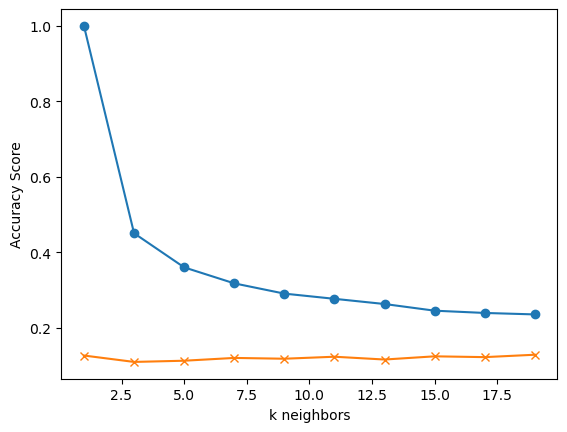

In [451]:
train_acc = []
test_acc = []
for k in range(1, 20, 2):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    train_accuracy = knn.score(X_train, y_train)
    test_accuracy = knn.score(X_test, y_test)
    all_accuracy = train_accuracy + test_accuracy
    train_acc.append(train_accuracy)
    test_acc.append(test_accuracy)
    print(f"k: {k}, Train/Test Accuracy: {train_accuracy:.3f}/{test_accuracy:.3f}, {all_accuracy:.3f}")
    
plt.plot(range(1, 20, 2), train_acc, marker='o')
plt.plot(range(1, 20, 2), test_acc, marker="x")
plt.xlabel("k neighbors")
plt.ylabel("Accuracy Score")
plt.show()


# Feature Selection Analysis


In [452]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as st
import seaborn as sn

from scipy.stats import linregress

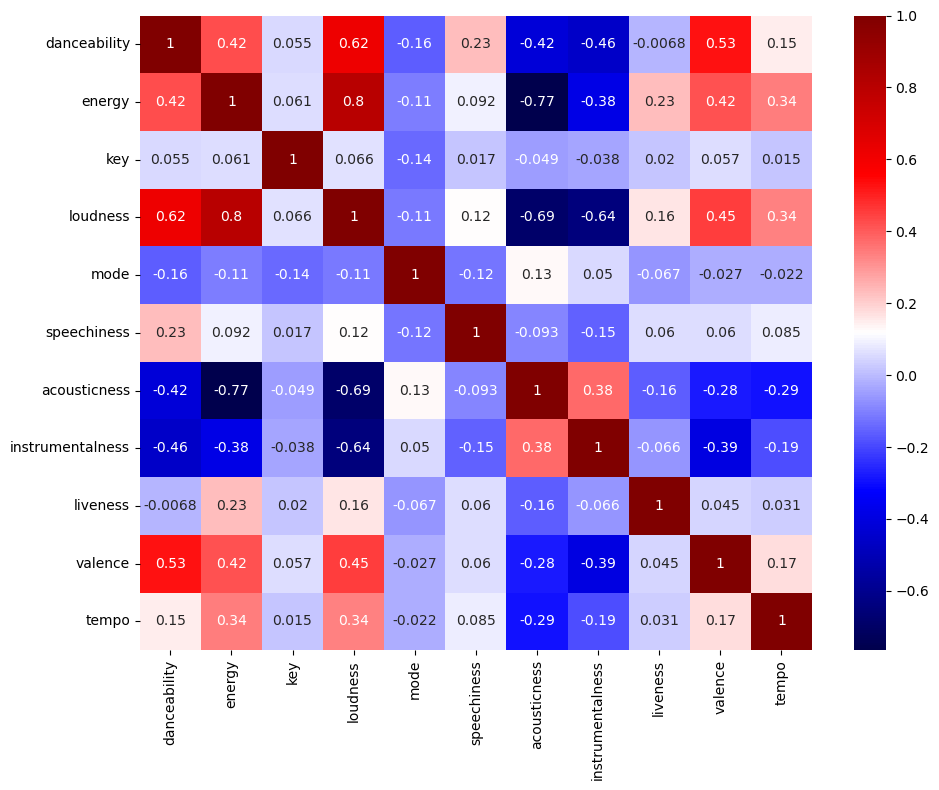

In [453]:
all_features = pd.DataFrame(ML_df, columns=['danceability',
                            'energy',
                            'key',
                            'loudness',
                            'mode', 
                            'speechiness', 
                            'acousticness', 
                            'instrumentalness', 
                            'liveness', 
                            'valence', 
                            'tempo'],)
corrMatrix = all_features.corr()
plt.figure(figsize=(10,8))
sn.heatmap(corrMatrix, cmap='seismic', annot=True)
fig_name = "all_features"
plt.tight_layout()
plt.show()

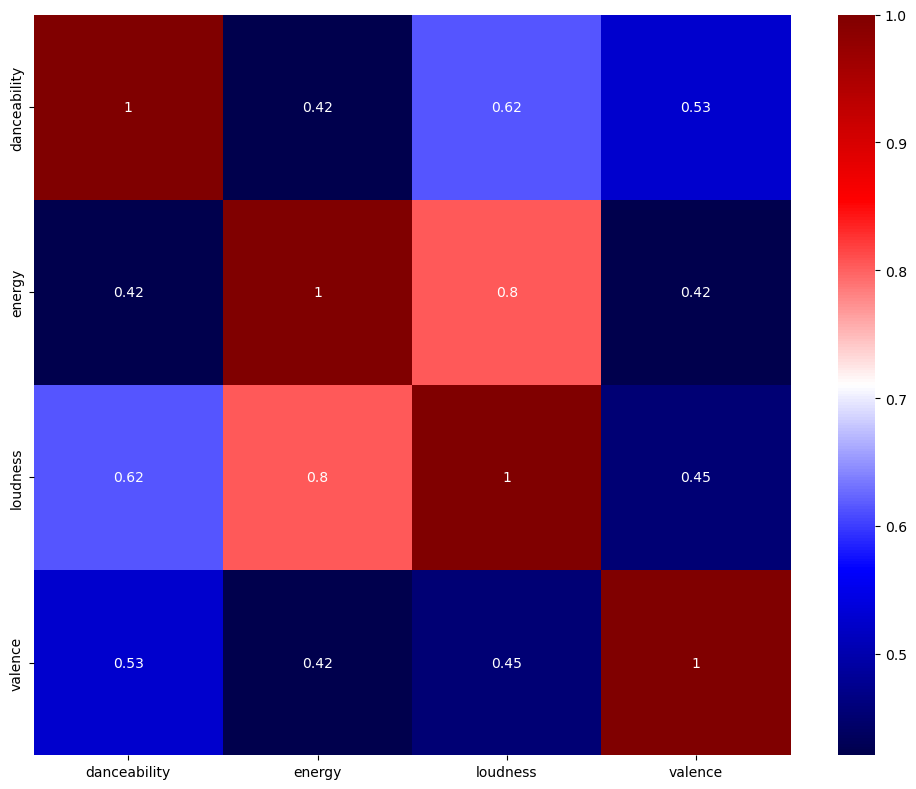

In [454]:
features_set_1 = pd.DataFrame(ML_df, columns=['danceability',
                            'energy',
                            'loudness', 
                            'valence', 
                            ],)
corrMatrix = features_set_1.corr()
plt.figure(figsize=(10,8))
sn.heatmap(corrMatrix, cmap='seismic', annot=True)
plt.tight_layout()
plt.show()

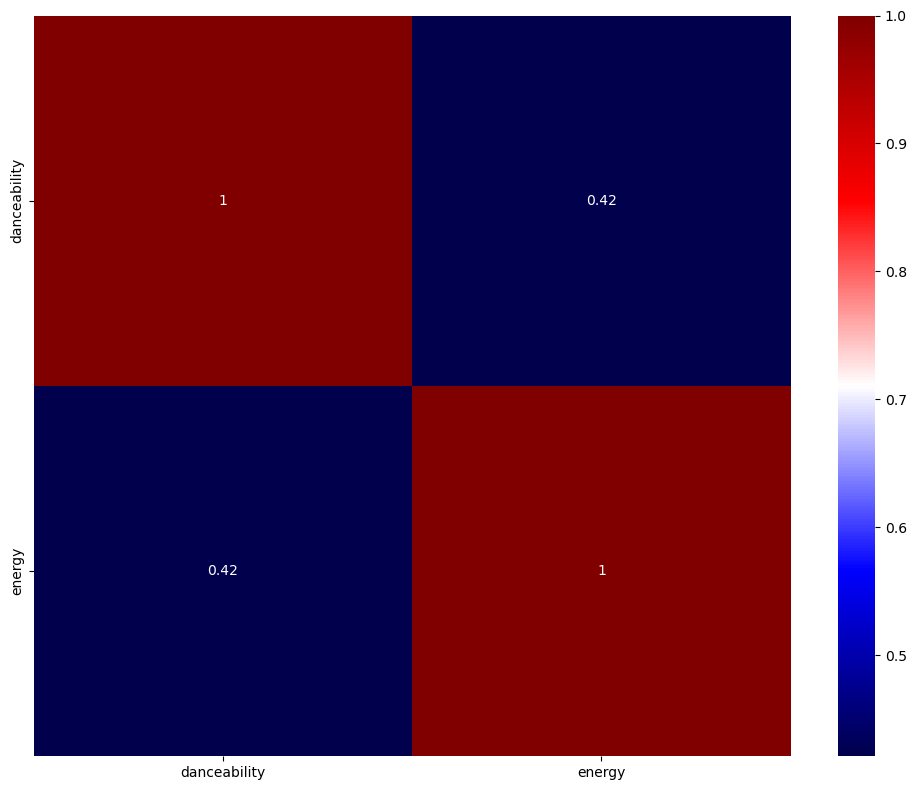

In [455]:
features_set_2 = pd.DataFrame(ML_df, columns=['danceability',
                            'energy'
                            ],)
corrMatrix = features_set_2.corr()
plt.figure(figsize=(10,8))
sn.heatmap(corrMatrix, cmap='seismic', annot=True)
plt.tight_layout()
plt.show()

Changing Genre Dataframe - Considering top 10 Grammy Genres

In [456]:
df = pd.read_csv(os.path.join("Downloads/spotify_df_Top10GrammyGenre.csv"))
df.head()

,artist_name,track_name,track_id,artist_href,track_href,genre_name,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
0,miley cyrus,flowers,0yLdNVWF3Srea0uzk55zFn,https://open.spotify.com/artist/5YGY8feqx7naU7...,https://open.spotify.com/track/0yLdNVWF3Srea0u...,Pop,0.707,0.681,0,-4.325,1,0.0668,0.0632,0.000005,0.0322,0.646,117.999,200455
1,sza,kill bill,1Qrg8KqiBpW07V7PNxwwwL,https://open.spotify.com/artist/7tYKF4w9nC0nq9...,https://open.spotify.com/track/1Qrg8KqiBpW07V7...,Pop,0.644,0.735,8,-5.747,1,0.0391,0.0521,0.144000,0.1610,0.418,88.980,153947
2,taylor swift,anti-hero,0V3wPSX9ygBnCm8psDIegu,https://open.spotify.com/artist/06HL4z0CvFAxyc...,https://open.spotify.com/track/0V3wPSX9ygBnCm8...,Pop,0.637,0.643,4,-6.571,1,0.0519,0.1300,0.000002,0.1420,0.533,97.008,200690
3,drake,search & rescue,7aRCf5cLOFN1U7kvtChY1G,https://open.spotify.com/artist/3TVXtAsR1Inumw...,https://open.spotify.com/track/7aRCf5cLOFN1U7k...,Pop,0.817,0.440,10,-8.482,0,0.0734,0.0603,0.000001,0.3300,0.544,142.024,272113
4,fifty fifty,cupid - twin ver.,7FbrGaHYVDmfr7KoLIZnQ7,https://open.spotify.com/artist/4GJ6xDCF5jaUqD...,https://open.spotify.com/track/7FbrGaHYVDmfr7K...,Pop,0.783,0.592,11,-8.332,0,0.0331,0.4350,0.000004,0.3470,0.726,120.018,174253


In [457]:
ML_df = df.drop(['artist_name', 'track_name', 'track_id', 'artist_href', 'track_href'], axis=1)
ML_df.head()

,genre_name,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
0,Pop,0.707,0.681,0,-4.325,1,0.0668,0.0632,0.000005,0.0322,0.646,117.999,200455
1,Pop,0.644,0.735,8,-5.747,1,0.0391,0.0521,0.144000,0.1610,0.418,88.980,153947
2,Pop,0.637,0.643,4,-6.571,1,0.0519,0.1300,0.000002,0.1420,0.533,97.008,200690
3,Pop,0.817,0.440,10,-8.482,0,0.0734,0.0603,0.000001,0.3300,0.544,142.024,272113
4,Pop,0.783,0.592,11,-8.332,0,0.0331,0.4350,0.000004,0.3470,0.726,120.018,174253


trying with KNN

In [458]:
y = ML_df["genre_name"]
X = ML_df.drop("genre_name", axis=1)
X.head()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
0,0.707,0.681,0,-4.325,1,0.0668,0.0632,0.000005,0.0322,0.646,117.999,200455
1,0.644,0.735,8,-5.747,1,0.0391,0.0521,0.144000,0.1610,0.418,88.980,153947
2,0.637,0.643,4,-6.571,1,0.0519,0.1300,0.000002,0.1420,0.533,97.008,200690
3,0.817,0.440,10,-8.482,0,0.0734,0.0603,0.000001,0.3300,0.544,142.024,272113
4,0.783,0.592,11,-8.332,0,0.0331,0.4350,0.000004,0.3470,0.726,120.018,174253


In [459]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y)

k: 1, Train/Test Accuracy Score: 1.000/0.140, 1.140
k: 3, Train/Test Accuracy Score: 0.487/0.148, 0.635
k: 5, Train/Test Accuracy Score: 0.422/0.142, 0.563
k: 7, Train/Test Accuracy Score: 0.374/0.164, 0.538
k: 9, Train/Test Accuracy Score: 0.347/0.170, 0.517
k: 11, Train/Test Accuracy Score: 0.325/0.175, 0.499
k: 13, Train/Test Accuracy Score: 0.320/0.181, 0.501
k: 15, Train/Test Accuracy Score: 0.308/0.190, 0.497
k: 17, Train/Test Accuracy Score: 0.294/0.184, 0.478
k: 19, Train/Test Accuracy Score: 0.284/0.187, 0.471


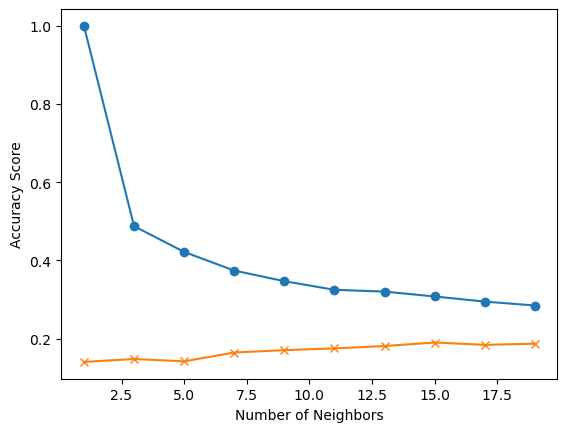

In [461]:
train_acc_scores = []
test_acc_scores = []

for n in range(1, 20, 2):
    knn = KNeighborsClassifier(n_neighbors=n)
    knn.fit(X_train, y_train)
    train_acc = knn.score(X_train, y_train)
    test_acc = knn.score(X_test, y_test)
    total_acc = train_acc + test_acc
    train_acc_scores.append(train_acc)
    test_acc_scores.append(test_acc)
    print(f"k: {n}, Train/Test Accuracy Score: {train_acc:.3f}/{test_acc:.3f}, {total_acc:.3f}")

plt.plot(range(1, 20, 2), train_acc_scores, marker='o')
plt.plot(range(1, 20, 2), test_acc_scores, marker="x")
plt.xlabel("Number of Neighbors")
plt.ylabel("Accuracy Score")
plt.show()


## Now trying with neural networks

In [462]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from tensorflow.keras.utils import to_categorical

In [463]:
X = ML_df.drop("genre_name", axis=1)
y = ML_df["genre_name"]
print(X.shape, y.shape)

(2654, 12) (2654,)


In [464]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, stratify=y)

In [465]:
X_scaler = MinMaxScaler().fit(X_train)
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [466]:
# Step 1: Label-encode data set
label_encoder = LabelEncoder()
label_encoder.fit(y_train)
encoded_y_train = label_encoder.transform(y_train)
encoded_y_test = label_encoder.transform(y_test)

In [467]:
# Step 2: Convert encoded labels to one-hot-encoding
y_train_categorical = to_categorical(encoded_y_train)
y_test_categorical = to_categorical(encoded_y_test)

In [468]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [469]:
# Create model and add layers
model = Sequential()
model.add(Dense(units=10, activation='relu', input_dim=12))
# model.add(Dense(units=9, activation='sigmoid'))
# model.add(Dense(units=9, activation='sigmoid'))
# model.add(Dense(units=9, activation='sigmoid'))
model.add(Dense(units=10, activation='relu'))
model.add(Dense(units=10, activation='relu'))
model.add(Dense(units=10, activation='relu'))
# model.add(Dense(units=9, activation='relu'))
# model.add(Dense(units=9, activation='relu'))
model.add(Dense(units=10, activation='softmax'))

In [470]:
# Compile and fit the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [471]:
model.summary()

Model: "sequential_32"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_136 (Dense)           (None, 10)                130       
                                                                 
 dense_137 (Dense)           (None, 10)                110       
                                                                 
 dense_138 (Dense)           (None, 10)                110       
                                                                 
 dense_139 (Dense)           (None, 10)                110       
                                                                 
 dense_140 (Dense)           (None, 10)                110       
                                                                 
Total params: 570
Trainable params: 570
Non-trainable params: 0
_________________________________________________________________


In [472]:
model.fit(
    X_train_scaled,
    y_train_categorical,
    epochs=10,
    shuffle=True,
    verbose=2
)

Epoch 1/10
63/63 - 1s - loss: 2.2902 - accuracy: 0.1588 - 775ms/epoch - 12ms/step
Epoch 2/10
63/63 - 0s - loss: 2.2522 - accuracy: 0.1819 - 75ms/epoch - 1ms/step
Epoch 3/10
63/63 - 0s - loss: 2.1757 - accuracy: 0.1839 - 74ms/epoch - 1ms/step
Epoch 4/10
63/63 - 0s - loss: 2.1069 - accuracy: 0.2126 - 67ms/epoch - 1ms/step
Epoch 5/10
63/63 - 0s - loss: 2.0621 - accuracy: 0.2266 - 67ms/epoch - 1ms/step
Epoch 6/10
63/63 - 0s - loss: 2.0200 - accuracy: 0.2528 - 75ms/epoch - 1ms/step
Epoch 7/10
63/63 - 0s - loss: 1.9802 - accuracy: 0.2588 - 75ms/epoch - 1ms/step
Epoch 8/10
63/63 - 0s - loss: 1.9386 - accuracy: 0.2744 - 82ms/epoch - 1ms/step
Epoch 9/10
63/63 - 0s - loss: 1.9038 - accuracy: 0.2854 - 67ms/epoch - 1ms/step
Epoch 10/10
63/63 - 0s - loss: 1.8708 - accuracy: 0.2975 - 58ms/epoch - 922us/step


In [473]:
model_loss, model_accuracy = model.evaluate(
    X_test_scaled, y_test_categorical, verbose=2)
print(
    f"Normal Neural Network - Loss: {model_loss}, Accuracy: {model_accuracy}")

21/21 - 0s - loss: 1.9141 - accuracy: 0.2967 - 116ms/epoch - 6ms/step
Normal Neural Network - Loss: 1.9141441583633423, Accuracy: 0.29668673872947693


## Now trying it with less features

In [474]:
droppedML_df = ML_df.drop([
                            'key',
                            
                            'mode', 
                            'speechiness', 
                            'acousticness', 
                            'instrumentalness', 
                            'liveness', 
                            ],
                           axis=1)

# dropped_ML_df()
# print(dropped_ML_df)
droppedML_df.iloc[3:13]

,genre_name,danceability,energy,loudness,valence,tempo,duration_ms
3,Pop,0.817,0.440,-8.482,0.544,142.024,272113
4,Pop,0.783,0.592,-8.332,0.726,120.018,174253
5,Pop,0.801,0.806,-5.206,0.802,106.999,239318
6,Pop,0.571,0.544,-10.613,0.216,132.052,132631
7,Pop,0.559,0.551,-7.231,0.392,143.008,201800
8,Pop,0.369,0.192,-12.151,0.148,175.212,228013
9,Pop,0.552,0.702,-5.707,0.564,169.994,178427
10,Pop,0.561,0.520,-9.342,0.424,153.150,239360
11,Pop,0.574,0.469,-8.209,0.288,132.023,242485
12,Pop,0.582,0.568,-7.300,0.394,121.991,207541


In [475]:
X = droppedML_df.drop("genre_name", axis=1)
y = droppedML_df["genre_name"]
print(X.shape, y.shape)

(2654, 6) (2654,)


In [476]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, stratify=y)

In [477]:
X_scaler = MinMaxScaler().fit(X_train)
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [478]:
# Step 1: Label-encode data set
label_encoder = LabelEncoder()
label_encoder.fit(y_train)
encoded_y_train = label_encoder.transform(y_train)
encoded_y_test = label_encoder.transform(y_test)

In [479]:
# Step 2: Convert encoded labels to one-hot-encoding
y_train_categorical = to_categorical(encoded_y_train)
y_test_categorical = to_categorical(encoded_y_test)

In [480]:
# Create model and add layers
model = Sequential()
model.add(Dense(units=10, activation='relu', input_dim=6))
# model.add(Dense(units=10, activation='sigmoid'))
# model.add(Dense(units=10, activation='sigmoid'))
# model.add(Dense(units=10, activation='sigmoid'))
model.add(Dense(units=10, activation='relu'))
# model.add(Dense(units=10, activation='relu'))
# model.add(Dense(units=10, activation='relu'))
# model.add(Dense(units=10, activation='relu'))
# model.add(Dense(units=10, activation='relu'))
model.add(Dense(units=10, activation='softmax'))

In [481]:
# Compile and fit the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [482]:
model.summary()

Model: "sequential_33"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_141 (Dense)           (None, 10)                70        
                                                                 
 dense_142 (Dense)           (None, 10)                110       
                                                                 
 dense_143 (Dense)           (None, 10)                110       
                                                                 
Total params: 290
Trainable params: 290
Non-trainable params: 0
_________________________________________________________________


In [483]:
model.fit(
    X_train_scaled,
    y_train_categorical,
    epochs=10,
    shuffle=True,
    verbose=2
)

Epoch 1/10
63/63 - 0s - loss: 2.3010 - accuracy: 0.1010 - 463ms/epoch - 7ms/step
Epoch 2/10
63/63 - 0s - loss: 2.2860 - accuracy: 0.1417 - 80ms/epoch - 1ms/step
Epoch 3/10
63/63 - 0s - loss: 2.2723 - accuracy: 0.1492 - 58ms/epoch - 916us/step
Epoch 4/10
63/63 - 0s - loss: 2.2573 - accuracy: 0.1729 - 61ms/epoch - 976us/step
Epoch 5/10
63/63 - 0s - loss: 2.2439 - accuracy: 0.2060 - 83ms/epoch - 1ms/step
Epoch 6/10
63/63 - 0s - loss: 2.2289 - accuracy: 0.2176 - 68ms/epoch - 1ms/step
Epoch 7/10
63/63 - 0s - loss: 2.2099 - accuracy: 0.2286 - 67ms/epoch - 1ms/step
Epoch 8/10
63/63 - 0s - loss: 2.1880 - accuracy: 0.2447 - 66ms/epoch - 1ms/step
Epoch 9/10
63/63 - 0s - loss: 2.1673 - accuracy: 0.2482 - 73ms/epoch - 1ms/step
Epoch 10/10
63/63 - 0s - loss: 2.1451 - accuracy: 0.2472 - 77ms/epoch - 1ms/step


In [484]:
model_loss, model_accuracy = model.evaluate(
    X_test_scaled, y_test_categorical, verbose=2)
print(
    f"Normal Neural Network - Loss: {model_loss}, Accuracy: {model_accuracy}")

21/21 - 0s - loss: 2.1814 - accuracy: 0.2395 - 115ms/epoch - 5ms/step
Normal Neural Network - Loss: 2.1813647747039795, Accuracy: 0.23945783078670502


Changing Genre Dataframe Changed - Considering Top 7Grammy Genres 

In [485]:
df = pd.read_csv(os.path.join("Downloads/spotify_df_Top7GrammyGenre.csv"))
df.head()

,artist_name,track_name,track_id,artist_href,track_href,genre_name,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
0,miley cyrus,flowers,0yLdNVWF3Srea0uzk55zFn,https://open.spotify.com/artist/5YGY8feqx7naU7...,https://open.spotify.com/track/0yLdNVWF3Srea0u...,Pop,0.707,0.681,0,-4.325,1,0.0668,0.0632,0.000005,0.0322,0.646,117.999,200455
1,sza,kill bill,1Qrg8KqiBpW07V7PNxwwwL,https://open.spotify.com/artist/7tYKF4w9nC0nq9...,https://open.spotify.com/track/1Qrg8KqiBpW07V7...,Pop,0.644,0.735,8,-5.747,1,0.0391,0.0521,0.144000,0.1610,0.418,88.980,153947
2,taylor swift,anti-hero,0V3wPSX9ygBnCm8psDIegu,https://open.spotify.com/artist/06HL4z0CvFAxyc...,https://open.spotify.com/track/0V3wPSX9ygBnCm8...,Pop,0.637,0.643,4,-6.571,1,0.0519,0.1300,0.000002,0.1420,0.533,97.008,200690
3,drake,search & rescue,7aRCf5cLOFN1U7kvtChY1G,https://open.spotify.com/artist/3TVXtAsR1Inumw...,https://open.spotify.com/track/7aRCf5cLOFN1U7k...,Pop,0.817,0.440,10,-8.482,0,0.0734,0.0603,0.000001,0.3300,0.544,142.024,272113
4,fifty fifty,cupid - twin ver.,7FbrGaHYVDmfr7KoLIZnQ7,https://open.spotify.com/artist/4GJ6xDCF5jaUqD...,https://open.spotify.com/track/7FbrGaHYVDmfr7K...,Pop,0.783,0.592,11,-8.332,0,0.0331,0.4350,0.000004,0.3470,0.726,120.018,174253


In [488]:
ML_df = df.drop(['artist_name', 'track_name', 'track_id', 'artist_href', 'track_href'], axis=1)
ML_df = ML_df.reset_index(drop=True)

ML_df

,genre_name,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
0,Pop,0.707,0.681,0,-4.325,1,0.0668,0.063200,0.000005,0.0322,0.646,117.999,200455
1,Pop,0.644,0.735,8,-5.747,1,0.0391,0.052100,0.144000,0.1610,0.418,88.980,153947
2,Pop,0.637,0.643,4,-6.571,1,0.0519,0.130000,0.000002,0.1420,0.533,97.008,200690
3,Pop,0.817,0.440,10,-8.482,0,0.0734,0.060300,0.000001,0.3300,0.544,142.024,272113
4,Pop,0.783,0.592,11,-8.332,0,0.0331,0.435000,0.000004,0.3470,0.726,120.018,174253
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1832,New Age,0.352,0.796,7,-6.879,1,0.0352,0.000255,0.000058,0.3050,0.426,179.379,179240
1833,New Age,0.603,0.740,5,-12.128,0,0.0358,0.191000,0.969000,0.1100,0.102,123.997,379083
1834,New Age,0.555,0.501,5,-14.892,1,0.9330,0.793000,0.000000,0.9100,0.322,64.438,152125
1835,New Age,0.603,0.409,5,-14.871,1,0.0310,0.394000,0.490000,0.0633,0.141,97.188,354667


In [489]:
ML_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1837 entries, 0 to 1836
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   genre_name        1837 non-null   object 
 1   danceability      1837 non-null   float64
 2   energy            1837 non-null   float64
 3   key               1837 non-null   int64  
 4   loudness          1837 non-null   float64
 5   mode              1837 non-null   int64  
 6   speechiness       1837 non-null   float64
 7   acousticness      1837 non-null   float64
 8   instrumentalness  1837 non-null   float64
 9   liveness          1837 non-null   float64
 10  valence           1837 non-null   float64
 11  tempo             1837 non-null   float64
 12  duration_ms       1837 non-null   int64  
dtypes: float64(9), int64(3), object(1)
memory usage: 186.7+ KB


## Now trying with KNN

In [490]:
y = ML_df["genre_name"]
X = ML_df.drop("genre_name", axis=1)
X.head(100)

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
0,0.707,0.681,0,-4.325,1,0.0668,0.06320,0.000005,0.0322,0.646,117.999,200455
1,0.644,0.735,8,-5.747,1,0.0391,0.05210,0.144000,0.1610,0.418,88.980,153947
2,0.637,0.643,4,-6.571,1,0.0519,0.13000,0.000002,0.1420,0.533,97.008,200690
3,0.817,0.440,10,-8.482,0,0.0734,0.06030,0.000001,0.3300,0.544,142.024,272113
4,0.783,0.592,11,-8.332,0,0.0331,0.43500,0.000004,0.3470,0.726,120.018,174253
...,...,...,...,...,...,...,...,...,...,...,...,...
95,0.726,0.698,5,-4.165,1,0.0431,0.04900,0.000000,0.3090,0.867,143.994,233478
96,0.509,0.637,4,-4.830,0,0.0471,0.07170,0.000011,0.0789,0.378,172.006,224000
97,0.696,0.559,7,-9.190,1,0.0693,0.06180,0.000056,0.0887,0.433,163.999,194166
98,0.609,0.692,1,-2.958,1,0.0259,0.01570,0.000000,0.0864,0.454,116.959,233720


In [491]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y)
X_train

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
936,0.760,0.479,2,-5.574,1,0.0466,0.55600,0.000000,0.0703,0.9130,89.911,158040
1060,0.633,0.548,5,-5.634,0,0.0467,0.26900,0.000000,0.1600,0.3500,160.011,192000
111,0.553,0.587,5,-6.829,1,0.0277,0.34500,0.100000,0.2560,0.3460,90.018,242293
939,0.901,0.464,5,-9.789,0,0.0645,0.36800,0.000017,0.2380,0.6380,109.004,203267
613,0.470,0.809,8,-6.740,1,0.0495,0.27200,0.006710,0.0491,0.4900,151.836,363240
...,...,...,...,...,...,...,...,...,...,...,...,...
342,0.720,0.978,9,-4.495,0,0.0595,0.00147,0.819000,0.0283,0.1960,127.984,210000
716,0.451,0.962,0,-3.947,1,0.0734,0.01880,0.000003,0.2770,0.3770,131.435,323707
1610,0.139,0.331,4,-13.226,0,0.0372,0.56900,0.876000,0.0959,0.0357,67.393,170333
1581,0.380,0.835,11,-9.627,0,0.0296,0.19200,0.837000,0.0965,0.7430,133.849,300000


### Baseline Accuracy


In [492]:
from sklearn.dummy import DummyClassifier

dummy_clf = DummyClassifier()

In [493]:
dummy_clf.fit(X_train, y_train)

DummyClassifier()

In [495]:
y_pred = dummy_clf.predict(X_test)
# print(y_pred)


In [496]:
dummy_score = dummy_clf.score(X_test, y_test)
print(dummy_score)

0.13695652173913042


In [497]:
from sklearn.preprocessing import StandardScaler

# Creating a StandardScater model and fit it to the training data
X_scaler = StandardScaler().fit(X_train)
X_scaler

StandardScaler()

In [498]:
X_test


,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
20,0.698,0.546,0,-7.234,0,0.0559,0.42500,0.003140,0.160,0.335,145.044,181080
229,0.575,0.568,9,-5.509,0,0.0300,0.04840,0.000417,0.286,0.370,93.986,206280
1003,0.825,0.572,6,-6.067,0,0.0864,0.00790,0.000000,0.113,0.568,141.991,175954
436,0.774,0.794,5,-4.446,0,0.0358,0.00824,0.003170,0.080,0.724,120.002,347880
865,0.684,0.671,7,-4.392,0,0.0464,0.18900,0.000024,0.122,0.156,88.048,199920
...,...,...,...,...,...,...,...,...,...,...,...,...
7,0.559,0.551,5,-7.231,1,0.1320,0.14100,0.000000,0.110,0.392,143.008,201800
838,0.558,0.559,6,-9.222,1,0.0959,0.37100,0.000007,0.109,0.620,78.558,180387
1652,0.702,0.915,3,-6.187,0,0.2010,0.03750,0.000002,0.059,0.722,90.022,176592
1537,0.661,0.633,7,-5.986,1,0.0348,0.03800,0.000003,0.124,0.613,81.984,209760


In [499]:

X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)
X_test_scaled[11]

array([-0.86270755,  1.07231145,  1.33160906,  0.81931649, -1.38692714,
       -0.55912542, -0.68932919, -0.07061185, -0.38835896, -0.09233465,
       -1.25278035,  0.13690747])

k: 1, Train/Test Accuracy: 1.000/0.183, 1.183
k: 3, Train/Test Accuracy: 0.500/0.159, 0.658
k: 5, Train/Test Accuracy: 0.426/0.200, 0.626
k: 7, Train/Test Accuracy: 0.386/0.222, 0.607
k: 9, Train/Test Accuracy: 0.363/0.222, 0.585
k: 11, Train/Test Accuracy: 0.351/0.222, 0.573
k: 13, Train/Test Accuracy: 0.344/0.217, 0.562
k: 15, Train/Test Accuracy: 0.335/0.237, 0.572
k: 17, Train/Test Accuracy: 0.330/0.228, 0.558
k: 19, Train/Test Accuracy: 0.325/0.222, 0.546
k: 21, Train/Test Accuracy: 0.314/0.200, 0.514
k: 23, Train/Test Accuracy: 0.300/0.226, 0.526
k: 25, Train/Test Accuracy: 0.303/0.226, 0.529
k: 27, Train/Test Accuracy: 0.300/0.220, 0.519
k: 29, Train/Test Accuracy: 0.301/0.228, 0.529


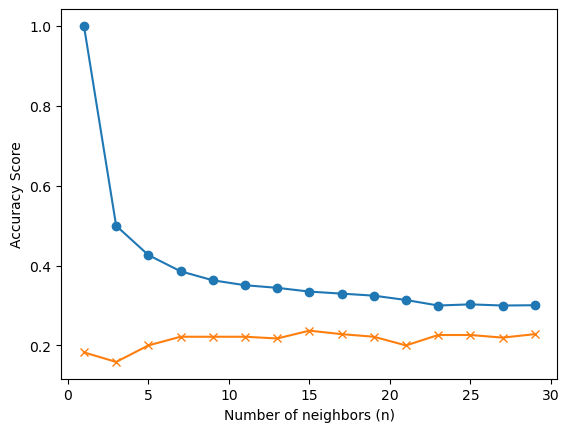

In [501]:
train_accs = []
test_accs = []

for n in range(1, 30, 2):
    knn = KNeighborsClassifier(n_neighbors=n)
    knn.fit(X_train, y_train)
    train_acc = knn.score(X_train, y_train)
    test_acc = knn.score(X_test, y_test)
    avg_acc = train_acc + test_acc
    train_accs.append(train_acc)
    test_accs.append(test_acc)
    print(f"k: {n}, Train/Test Accuracy: {train_acc:.3f}/{test_acc:.3f}, {avg_acc:.3f}")

plt.plot(range(1, 30, 2), train_accs, marker='o')
plt.plot(range(1, 30, 2), test_accs, marker='x')
plt.xlabel("Number of neighbors (n)")
plt.ylabel("Accuracy Score")
plt.show()


creating a KNN (k-Nearest Neighbors) classifier with k=19, fitting the classifier on the training data, and then calculating the accuracy score on the test data.  then defining several new data points and predicting their classes using the trained classifier. 

In [502]:
knn = KNeighborsClassifier(n_neighbors=19)
knn.fit(X_train_scaled, y_train)
print('k=19 Test Acc: %.3f' % knn.score(X_test_scaled, y_test))

k=19 Test Acc: 0.435


In [503]:
snew_data = 0.2, 0.2, 10, -30, 1, 0.05, 0.8, 0.8, 0.5, 0.2, 0.1, 222222


In [504]:

new_data = [[0.765, 0.307, 11, -10.472, 1, 0.0328, 0.727, .00000215,0.109,0.257,119.836, 206109]]
new_data_1 = [[0.111, 0.777, 2, -2, 0, 0.0111, 0.111, .00111, 0.9, 0.9, 50, 333333]]
new_data_2 = [[0.2, 0.2, 10, -30, 1, 0.05, 0.8, 0.8, 0.5, 0.2, 0.1, 222222]]
new_data_3 = [[0.79317033,0.91557169,1.06375534,0.73925307,0.67278438,2.26520775,-1.03279864,-0.48199241,-0.35157953,-1.57235678,-0.91074136,-0.63348198]]
new_data_4 = [[-1.14087944,1.24642326,1.06375534,0.41127868,0.67278438,-0.47284276,-1.07621207,1.42227523,0.16892679,-0.22550447,-0.98815799,0.81730637]]
new_data_5 = [[0.446,0.239,0,-13.945,1,0.0316,0.5510,0.000004,0.0697,0.298,189.507,336453]]
predicted_class = knn.predict(X_test_scaled)
print(predicted_class)

['Rap' 'Dance/Electronic' 'Rap' 'Dance/Electronic' 'Dance/Electronic'
 'Dance/Electronic' 'New Age' 'Country' 'New Age' 'Pop' 'Country' 'Rock'
 'Rap' 'Country' 'Dance/Electronic' 'R&B' 'New Age' 'Pop' 'Country'
 'Country' 'Dance/Electronic' 'Country' 'Dance/Electronic'
 'Dance/Electronic' 'Country' 'Rap' 'Pop' 'Pop' 'Country' 'Pop' 'Pop'
 'Rock' 'R&B' 'Country' 'Pop' 'Dance/Electronic' 'Dance/Electronic'
 'Dance/Electronic' 'Pop' 'Rap' 'Rock' 'Rap' 'Rap' 'Rock'
 'Dance/Electronic' 'Rap' 'Rap' 'Country' 'New Age' 'New Age' 'Rock'
 'Rock' 'Rock' 'Rap' 'Dance/Electronic' 'Dance/Electronic' 'Country'
 'New Age' 'New Age' 'Country' 'Country' 'Country' 'Rap' 'Pop' 'Pop' 'Pop'
 'Rock' 'Pop' 'Rock' 'Rock' 'New Age' 'Country' 'Country' 'Rap' 'Rap'
 'Country' 'Country' 'Country' 'New Age' 'Country' 'Dance/Electronic'
 'Country' 'New Age' 'R&B' 'Dance/Electronic' 'Country' 'New Age'
 'Dance/Electronic' 'Rap' 'Pop' 'Country' 'Country' 'Rap' 'Country' 'Rock'
 'Rock' 'Dance/Electronic' 'Dance/Electr

In [505]:
import pickle
# save the model to disk
filename = 'audio_features_model.csv'
pickle.dump(knn, open(filename, 'wb')) 

# save scalar
pickle.dump(X_scaler, open("scaler.pickle", "wb"))

# load the model from disk
loaded_model = pickle.load(open(filename, 'rb'))
result = loaded_model.score(X_test_scaled, y_test)
print(result)

0.43478260869565216


## Now trying with neural networks

In [506]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from tensorflow.keras.utils import to_categorical

In [507]:
X = ML_df.drop("genre_name", axis=1)
y = ML_df["genre_name"]
print(X.shape, y.shape)

(1837, 12) (1837,)


In [508]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, stratify=y)

In [509]:
X_train

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
856,0.617,0.378,9,-8.540,1,0.0315,0.4280,0.000092,0.110,0.2200,141.967,216063
927,0.883,0.657,8,-5.748,1,0.3050,0.0603,0.000000,0.128,0.2840,124.992,172933
444,0.773,0.955,2,-6.461,1,0.0413,0.0273,0.827000,0.125,0.3040,130.003,329792
860,0.538,0.471,4,-9.840,0,0.0955,0.0946,0.018500,0.116,0.3070,93.070,142000
846,0.790,0.647,10,-5.983,0,0.1360,0.0515,0.000000,0.248,0.6540,87.999,211000
...,...,...,...,...,...,...,...,...,...,...,...,...
1253,0.428,0.443,2,-8.955,0,0.1010,0.5250,0.000018,0.219,0.2000,87.934,180954
1339,0.544,0.826,1,-3.848,1,0.0288,0.0631,0.000015,0.113,0.5960,142.029,205579
1185,0.770,0.347,2,-10.265,1,0.0623,0.0511,0.000003,0.087,0.0583,84.957,235477
1769,0.378,0.173,7,-18.001,1,0.0553,0.9890,0.917000,0.113,0.0955,79.903,294760


In [510]:
X_scaler = MinMaxScaler().fit(X_train)
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [511]:
# Step 1: Label-encode data set
label_encoder = LabelEncoder()
label_encoder.fit(y_train)
encoded_y_train = label_encoder.transform(y_train)
encoded_y_test = label_encoder.transform(y_test)

In [512]:
# Step 2: Convert encoded labels to one-hot-encoding
y_train_categorical = to_categorical(encoded_y_train)
y_test_categorical = to_categorical(encoded_y_test)

In [513]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [515]:
# Create model and add layers
model = Sequential()
model.add(Dense(units=7, activation='relu', input_dim=12))
# model.add(Dense(units=7, activation='sigmoid'))
# model.add(Dense(units=7, activation='sigmoid'))
# model.add(Dense(units=, activation='sigmoid'))
model.add(Dense(units=7, activation='relu'))
# model.add(Dense(units=7, activation='relu'))
# model.add(Dense(units=7, activation='relu'))
# model.add(Dense(units=7, activation='relu'))
# model.add(Dense(units=7, activation='relu'))
model.add(Dense(units=7, activation='softmax'))

In [516]:
# Compile and fit the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [517]:
model.fit(
    X_train_scaled,
    y_train_categorical,
    epochs=10,
    shuffle=True,
    verbose=2
)

Epoch 1/10
44/44 - 0s - loss: 1.9533 - accuracy: 0.1220 - 451ms/epoch - 10ms/step
Epoch 2/10
44/44 - 0s - loss: 1.9367 - accuracy: 0.1743 - 54ms/epoch - 1ms/step
Epoch 3/10
44/44 - 0s - loss: 1.9301 - accuracy: 0.2070 - 50ms/epoch - 1ms/step
Epoch 4/10
44/44 - 0s - loss: 1.9245 - accuracy: 0.2259 - 50ms/epoch - 1ms/step
Epoch 5/10
44/44 - 0s - loss: 1.9188 - accuracy: 0.2229 - 50ms/epoch - 1ms/step
Epoch 6/10
44/44 - 0s - loss: 1.9134 - accuracy: 0.2426 - 50ms/epoch - 1ms/step
Epoch 7/10
44/44 - 0s - loss: 1.9079 - accuracy: 0.2251 - 50ms/epoch - 1ms/step
Epoch 8/10
44/44 - 0s - loss: 1.9032 - accuracy: 0.2288 - 47ms/epoch - 1ms/step
Epoch 9/10
44/44 - 0s - loss: 1.8974 - accuracy: 0.2302 - 47ms/epoch - 1ms/step
Epoch 10/10
44/44 - 0s - loss: 1.8923 - accuracy: 0.2360 - 42ms/epoch - 947us/step


In [518]:
model_loss, model_accuracy = model.evaluate(
    X_test_scaled, y_test_categorical, verbose=2)
print(
    f"Normal Neural Network - Loss: {model_loss}, Accuracy: {model_accuracy}")

15/15 - 0s - loss: 1.8940 - accuracy: 0.2196 - 136ms/epoch - 9ms/step
Normal Neural Network - Loss: 1.8939695358276367, Accuracy: 0.21956521272659302


In [519]:
encoded_predictions = model.predict(X_test_scaled[:5]).argmax(axis=-1)
prediction_labels = label_encoder.inverse_transform(encoded_predictions)

1/1 [==============================] - 0s 54ms/step


In [520]:
print(f"Predicted classes: {prediction_labels}")
print(f"Actual Labels: {list(y_test[:5])}")

Predicted classes: ['Dance/Electronic' 'Country' 'Rock' 'Country' 'Rock']
Actual Labels: ['Rock', 'Country', 'New Age', 'Rock', 'Rock']


In [231]:
# model.save("Downloads/audio_features_model.h5")

In [521]:
from tensorflow.keras.models import load_model
model = load_model("Downloads/audio_features_model.h5")

Trying with logistic regression

In [522]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import os

In [523]:
# Assign X (data) and y (target)
X = ML_df.drop("genre_name", axis=1)
y = ML_df["genre_name"]
print(X.shape, y.shape)

(1837, 12) (1837,)


In [524]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y)

In [525]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier

LogisticRegression()

In [526]:
classifier.fit(X_train, y_train)

LogisticRegression()

In [527]:
print(f"Training Data Score: {classifier.score(X_train, y_train)}")
print(f"Testing Data Score: {classifier.score(X_test, y_test)}")

Training Data Score: 0.15468409586056645
Testing Data Score: 0.15434782608695652


In [528]:
predictions = classifier.predict(X_test)
print(f"First 10 Predictions:   {predictions[:10]}")
print(f"First 10 Actual labels: {y_test[:10].tolist()}")

First 10 Predictions:   ['Dance/Electronic' 'Dance/Electronic' 'Dance/Electronic'
 'Dance/Electronic' 'Dance/Electronic' 'Dance/Electronic'
 'Dance/Electronic' 'Dance/Electronic' 'Dance/Electronic'
 'Dance/Electronic']
First 10 Actual labels: ['Rap', 'Pop', 'R&B', 'New Age', 'Dance/Electronic', 'Pop', 'R&B', 'Rap', 'Dance/Electronic', 'Rap']


In [529]:
pd.DataFrame({"Prediction": predictions, "Actual": y_test}).reset_index(drop=True)

,Prediction,Actual
0,Dance/Electronic,Rap
1,Dance/Electronic,Pop
2,Dance/Electronic,R&B
3,Dance/Electronic,New Age
4,Dance/Electronic,Dance/Electronic
...,...,...
455,Dance/Electronic,Pop
456,Dance/Electronic,R&B
457,Dance/Electronic,R&B
458,Dance/Electronic,Rap


## Now trying with multiple linear models

In [530]:
# Use Pandas get_dummies to convert categorical data
ML_df = pd.get_dummies(ML_df)
ML_df.head()


,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,genre_name_Country,genre_name_Dance/Electronic,genre_name_New Age,genre_name_Pop,genre_name_R&B,genre_name_Rap,genre_name_Rock
0,0.707,0.681,0,-4.325,1,0.0668,0.0632,0.000005,0.0322,0.646,117.999,200455,False,False,False,True,False,False,False
1,0.644,0.735,8,-5.747,1,0.0391,0.0521,0.144000,0.1610,0.418,88.980,153947,False,False,False,True,False,False,False
2,0.637,0.643,4,-6.571,1,0.0519,0.1300,0.000002,0.1420,0.533,97.008,200690,False,False,False,True,False,False,False
3,0.817,0.440,10,-8.482,0,0.0734,0.0603,0.000001,0.3300,0.544,142.024,272113,False,False,False,True,False,False,False
4,0.783,0.592,11,-8.332,0,0.0331,0.4350,0.000004,0.3470,0.726,120.018,174253,False,False,False,True,False,False,False


In [531]:
X = ML_df[['danceability',
                            'energy',
                            'key',
                            'loudness',
                            'mode', 
                            'speechiness', 
                            'acousticness', 
                            'instrumentalness', 
                            'liveness', 
                            'valence', 
                            'tempo', 
                            'duration_ms']]
y = y = ML_df['genre_name_Rock'].values.reshape(-1, 1)
print(X.shape, y.shape)

(1837, 12) (1837, 1)


In [532]:
# Dropping extra dummy columns


ML_df = ML_df.drop(columns=['genre_name_Dance/Electronic',
                            'genre_name_Country', 
                            'genre_name_New Age', 
                            'genre_name_Rap', 
                            'genre_name_R&B', 
                            'genre_name_Pop'])
ML_df.head()


,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,genre_name_Rock
0,0.707,0.681,0,-4.325,1,0.0668,0.0632,0.000005,0.0322,0.646,117.999,200455,False
1,0.644,0.735,8,-5.747,1,0.0391,0.0521,0.144000,0.1610,0.418,88.980,153947,False
2,0.637,0.643,4,-6.571,1,0.0519,0.1300,0.000002,0.1420,0.533,97.008,200690,False
3,0.817,0.440,10,-8.482,0,0.0734,0.0603,0.000001,0.3300,0.544,142.024,272113,False
4,0.783,0.592,11,-8.332,0,0.0331,0.4350,0.000004,0.3470,0.726,120.018,174253,False


In [536]:
# Spliting the data into training and testing

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)


In [537]:
from sklearn.preprocessing import StandardScaler

# Creating a StandardScater model and fit it to the training data

X_scaler = StandardScaler().fit(X_train)
y_scaler = StandardScaler().fit(y_train)


In [538]:
# Transforming the training and testing data using the X_scaler and y_scaler models

X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)
y_train_scaled = y_scaler.transform(y_train)
y_test_scaled = y_scaler.transform(y_test)


In [539]:
# Create a LinearRegression model and fit it to the scaled training data

from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train_scaled, y_train_scaled)


LinearRegression()

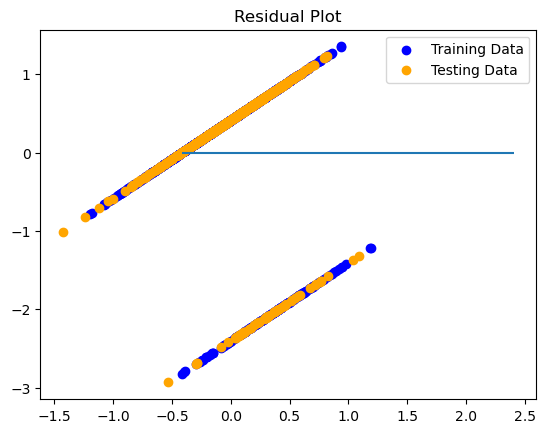

In [545]:
# Making predictions using a fitted model
# Ploting the difference between the model predicted values and actual y values, versus the model predicted values

predictions = model.predict(X_test_scaled)
model.fit(X_train_scaled, y_train_scaled)
plt.scatter(model.predict(X_train_scaled), model.predict(X_train_scaled) - y_train_scaled, c="blue", label="Training Data")
plt.scatter(model.predict(X_test_scaled), model.predict(X_test_scaled) - y_test_scaled, c="orange", label="Testing Data")
plt.legend()
plt.hlines(y=0, xmin=y_test_scaled.min(), xmax=y_test_scaled.max())
plt.title("Residual Plot")
plt.show()


In [546]:
# Used X_test_scaled, y_test_scaled, and model.predict(X_test_scaled) to calculate MSE and R2

from sklearn.metrics import mean_squared_error

MSE = mean_squared_error(y_test_scaled, predictions)
r2 = model.score(X_test_scaled, y_test_scaled)

print(f"MSE: {MSE}, R2: {r2}")


MSE: 0.8834898505991294, R2: 0.09640602790084662


In [547]:
# LASSO model
# Note: Use an alpha of .01 when creating the model for this activity
from sklearn.linear_model import Lasso

lasso = Lasso(alpha=.01).fit(X_train_scaled, y_train_scaled)

predictions = lasso.predict(X_test_scaled)

MSE = mean_squared_error(y_test_scaled, predictions)
r2 = lasso.score(X_test_scaled, y_test_scaled)

print(f"MSE: {MSE}, R2: {r2}")

MSE: 0.8816334373701857, R2: 0.09830468446408969


In [548]:
# Ridge model
from sklearn.linear_model import Ridge

ridge = Ridge(alpha=.01).fit(X_train_scaled, y_train_scaled)

predictions = ridge.predict(X_test_scaled)

MSE = mean_squared_error(y_test_scaled, predictions)
r2 = ridge.score(X_test_scaled, y_test_scaled)

print(f"MSE: {MSE}, R2: {r2}")

MSE: 0.8834897459043645, R2: 0.09640613497797779


In [544]:
# ElasticNet model
from sklearn.linear_model import ElasticNet

elasticnet = ElasticNet(alpha=.01).fit(X_train_scaled, y_train_scaled)

predictions = elasticnet.predict(X_test_scaled)

MSE = mean_squared_error(y_test_scaled, predictions)
r2 = elasticnet.score(X_test_scaled, y_test_scaled)

print(f"MSE: {MSE}, R2: {r2}")

MSE: 0.8820972446617862, R2: 0.09783032307485406


Trying with SVM Model

In [554]:


ML_df = df.drop(['artist_name', 'track_name', 'track_id', 'artist_href', 'track_href', 'genre_name'], axis=1)
ML_df

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
0,0.707,0.681,0,-4.325,1,0.0668,0.063200,0.000005,0.0322,0.646,117.999,200455
1,0.644,0.735,8,-5.747,1,0.0391,0.052100,0.144000,0.1610,0.418,88.980,153947
2,0.637,0.643,4,-6.571,1,0.0519,0.130000,0.000002,0.1420,0.533,97.008,200690
3,0.817,0.440,10,-8.482,0,0.0734,0.060300,0.000001,0.3300,0.544,142.024,272113
4,0.783,0.592,11,-8.332,0,0.0331,0.435000,0.000004,0.3470,0.726,120.018,174253
...,...,...,...,...,...,...,...,...,...,...,...,...
1832,0.352,0.796,7,-6.879,1,0.0352,0.000255,0.000058,0.3050,0.426,179.379,179240
1833,0.603,0.740,5,-12.128,0,0.0358,0.191000,0.969000,0.1100,0.102,123.997,379083
1834,0.555,0.501,5,-14.892,1,0.9330,0.793000,0.000000,0.9100,0.322,64.438,152125
1835,0.603,0.409,5,-14.871,1,0.0310,0.394000,0.490000,0.0633,0.141,97.188,354667


In [555]:


feature_names = ML_df.columns
ML_df.head()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
0,0.707,0.681,0,-4.325,1,0.0668,0.0632,0.000005,0.0322,0.646,117.999,200455
1,0.644,0.735,8,-5.747,1,0.0391,0.0521,0.144000,0.1610,0.418,88.980,153947
2,0.637,0.643,4,-6.571,1,0.0519,0.1300,0.000002,0.1420,0.533,97.008,200690
3,0.817,0.440,10,-8.482,0,0.0734,0.0603,0.000001,0.3300,0.544,142.024,272113
4,0.783,0.592,11,-8.332,0,0.0331,0.4350,0.000004,0.3470,0.726,120.018,174253


In [556]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(ML_df, target)
     


In [557]:
# Takes a very very long time to run

from sklearn.svm import SVC 
model = SVC(kernel='linear')
model.fit(X_train, y_train)

KeyboardInterrupt: 